# Paris Wifi usage: forecasting a time serie after an abrupt change due to COVID-19 lockdown

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Data-gathering" data-toc-modified-id="Data-gathering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data gathering</a></span><ul class="toc-item"><li><span><a href="#Opendatasoft-API,-ODSQL-query" data-toc-modified-id="Opendatasoft-API,-ODSQL-query-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Opendatasoft API, ODSQL query</a></span></li><li><span><a href="#From-Json-to-pandas-DataFrame" data-toc-modified-id="From-Json-to-pandas-DataFrame-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>From Json to pandas DataFrame</a></span></li><li><span><a href="#Variable-description" data-toc-modified-id="Variable-description-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Variable description</a></span></li></ul></li><li><span><a href="#Quick-EDA" data-toc-modified-id="Quick-EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Quick EDA</a></span><ul class="toc-item"><li><span><a href="#Correlation-and-pairplot" data-toc-modified-id="Correlation-and-pairplot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correlation and pairplot</a></span></li><li><span><a href="#Missing-data" data-toc-modified-id="Missing-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Missing data</a></span></li></ul></li><li><span><a href="#Time-serie-analysis" data-toc-modified-id="Time-serie-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time serie analysis</a></span><ul class="toc-item"><li><span><a href="#Pick-the-variable-to-predict" data-toc-modified-id="Pick-the-variable-to-predict-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Pick the variable to predict</a></span></li><li><span><a href="#Filling-missing-hours" data-toc-modified-id="Filling-missing-hours-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Filling missing hours</a></span></li><li><span><a href="#Plotting-the-serie-and-first-observations" data-toc-modified-id="Plotting-the-serie-and-first-observations-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plotting the serie and first observations</a></span></li><li><span><a href="#Seasonal-patterns:-Daily-and-weekly-effects" data-toc-modified-id="Seasonal-patterns:-Daily-and-weekly-effects-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Seasonal patterns: Daily and weekly effects</a></span><ul class="toc-item"><li><span><a href="#Daily-effect" data-toc-modified-id="Daily-effect-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Daily effect</a></span></li><li><span><a href="#Day-of-the-week-effect" data-toc-modified-id="Day-of-the-week-effect-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Day of the week effect</a></span></li></ul></li><li><span><a href="#Trend-and-seasonality-decomposition" data-toc-modified-id="Trend-and-seasonality-decomposition-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Trend and seasonality decomposition</a></span><ul class="toc-item"><li><span><a href="#Classical-additive-decomposition" data-toc-modified-id="Classical-additive-decomposition-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Classical additive decomposition</a></span><ul class="toc-item"><li><span><a href="#Entire-dataset" data-toc-modified-id="Entire-dataset-4.5.1.1"><span class="toc-item-num">4.5.1.1&nbsp;&nbsp;</span>Entire dataset</a></span></li><li><span><a href="#Period-1:-pre-lockdown" data-toc-modified-id="Period-1:-pre-lockdown-4.5.1.2"><span class="toc-item-num">4.5.1.2&nbsp;&nbsp;</span>Period 1: pre-lockdown</a></span></li><li><span><a href="#Period-2:-lockdown" data-toc-modified-id="Period-2:-lockdown-4.5.1.3"><span class="toc-item-num">4.5.1.3&nbsp;&nbsp;</span>Period 2: lockdown</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-4.5.1.4"><span class="toc-item-num">4.5.1.4&nbsp;&nbsp;</span>Observations</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Exponential-smoothing" data-toc-modified-id="Exponential-smoothing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Exponential smoothing</a></span><ul class="toc-item"><li><span><a href="#Vanilla-Holt's-Winters-exponential-smoothing" data-toc-modified-id="Vanilla-Holt's-Winters-exponential-smoothing-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Vanilla Holt's Winters exponential smoothing</a></span></li><li><span><a href="#Dampened-Holt's-Winters-exponential-smoothing" data-toc-modified-id="Dampened-Holt's-Winters-exponential-smoothing-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Dampened Holt's Winters exponential smoothing</a></span></li><li><span><a href="#Observations-and-conclusions" data-toc-modified-id="Observations-and-conclusions-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Observations and conclusions</a></span></li></ul></li><li><span><a href="#SARIMA" data-toc-modified-id="SARIMA-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SARIMA</a></span><ul class="toc-item"><li><span><a href="#ACF,-PACF,-Hyperparameters" data-toc-modified-id="ACF,-PACF,-Hyperparameters-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>ACF, PACF, Hyperparameters</a></span></li><li><span><a href="#Auto-SARIMA" data-toc-modified-id="Auto-SARIMA-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Auto SARIMA</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Facebook-Prophet" data-toc-modified-id="Facebook-Prophet-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Facebook Prophet</a></span><ul class="toc-item"><li><span><a href="#Out-of-the-box-Prophet-trained-on-the-lockdown-period-only" data-toc-modified-id="Out-of-the-box-Prophet-trained-on-the-lockdown-period-only-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Out-of-the-box Prophet trained on the lockdown period only</a></span></li><li><span><a href="#Prophet-without-Weekly-seasonality" data-toc-modified-id="Prophet-without-Weekly-seasonality-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Prophet without Weekly seasonality</a></span></li><li><span><a href="#Out-of-the-box-Prophet-trained-on-the-entire-dataset" data-toc-modified-id="Out-of-the-box-Prophet-trained-on-the-entire-dataset-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Out-of-the-box Prophet trained on the entire dataset</a></span></li></ul></li></ul></li><li><span><a href="#RMSE:-model-comparison" data-toc-modified-id="RMSE:-model-comparison-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>RMSE: model comparison</a></span></li><li><span><a href="#Closing-thoughts" data-toc-modified-id="Closing-thoughts-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Closing thoughts</a></span></li></ul></div>

## Abstract

The purpose of this notebook is to forecast the usage of Paris Open Wifi, more specifically the hourly data usage.

The challenge of this forecast is the presence an abrupt change in the time serie due to the COVID-19 lockdown. It results in a time serie composed of two very distinct periods, the second one showing lower data consumption and less difference from day to day (less weekly seasonality).
 
   
     
   
*Conclusions*:

- A naive approach consiting of training a model on the second period only, using a single 24 hours seasonal pattern and a trend is efficient for short term forecasting

- The models perfom differently from each other, but given the very naive modelling approach used to train those models it doesn't make much sense to rank them from a performance standpoint

- This time serie is too complex and random/noisy to make any use of the first time period in the model training stage, or to forecast long term. More complex models probably won't perform any better without additional external data 


In [1]:
# Import data science and time series forcasting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math 
import numpy as np
import pandas as pd
import pandas.io.json as pd_json
import statsmodels.api as sm

## Data gathering
 Let's gather the data from Paris opendata website:
 
 https://parisdata.opendatasoft.com/explore/dataset/paris-wi-fi-utilisation-des-hotspots-paris-wi-fi/export/?disjunctive.incomingzonelabel&disjunctive.incomingnetworklabel&disjunctive.device_portal_format&disjunctive.device_constructor_name&disjunctive.device_operating_system_name_version&disjunctive.device_browser_name_version&disjunctive.userlanguage&basemap=jawg.matrix&location=13,48.86099,2.37588
 
 
 The website allows us to query and even aggregate the data with SQL-like syntax, thanks to the Opendatasoft API
 
More on ODSQL:
 https://help.opendatasoft.com/apis/ods-search-v2/#language-elements

### Opendatasoft API, ODSQL query

The original data is constituted of all the individual logs of every session per wifi spot.

What the ODSQL query below will achieve:
- Select some of the variables in the dataset (**SELECT**)
- Aggregate (**SUM** and **GROUP_BY**) the data directly with the API using ODSQL in hourly bins, using end of session time to do the aggregate
- Rename the aggregates using SQL aliases (**AS**)

nb: the output is a Json file

In [2]:
import requests

# ODSQL code to integrate to the GET query string
params = {'select' : 'sum(duration) as length_sec,sum(temps_de_sessions_en_minutes) as length_min,sum(donnee_entrante_go) as in_go, sum(donnee_sortante_gigaoctet) as out_go,sum(packetsin) as packetsin, sum(packetsout) as packetsout', 
         'group_by' : 'date_format(endtime_or_dash, "YYYY-MM-dd\'T\'HH") as hour_end'}

# Get query (nb. no auth needed for Parisdata)
r = requests.get("https://parisdata.opendatasoft.com/api/v2/catalog/datasets/paris-wi-fi-utilisation-des-hotspots-paris-wi-fi/aggregates",
                 params=params)

# Returns 200 if the query works
r.status_code


200

### From Json to pandas DataFrame

In [3]:
# keep only the data
df = r.json()['aggregations']
df

[{'hour_end': '2019-09-01T00',
  'packetsout': 621622.0,
  'length_min': 443.5,
  'length_sec': 26610.0,
  'out_go': 107.40340328216553,
  'packetsin': 580586.0,
  'in_go': 694.1325225830078},
 {'hour_end': '2019-09-01T07',
  'packetsout': 21433.0,
  'length_min': 24.666666666666664,
  'length_sec': 1480.0,
  'out_go': 2.468071937561035,
  'packetsin': 17111.0,
  'in_go': 25.362119674682617},
 {'hour_end': '2019-09-01T08',
  'packetsout': 436454.0,
  'length_min': 330.15000000000003,
  'length_sec': 19809.0,
  'out_go': 48.547319412231445,
  'packetsin': 416317.0,
  'in_go': 630.1328821182251},
 {'hour_end': '2019-09-01T09',
  'packetsout': 1161646.0,
  'length_min': 853.4333333333334,
  'length_sec': 51206.0,
  'out_go': 175.36730003356934,
  'packetsin': 1100175.0,
  'in_go': 1557.161129951477},
 {'hour_end': '2019-09-01T10',
  'packetsout': 2571928.0,
  'length_min': 1622.0666666666666,
  'length_sec': 97324.0,
  'out_go': 355.86314964294434,
  'packetsin': 2251355.0,
  'in_go': 338

In [4]:
# Normalize json file to panda dataframe
df = pd.json_normalize(df)
df

hour_end  packetsout   length_min  length_sec      out_go  \
0     2019-09-01T00    621622.0   443.500000     26610.0  107.403403   
1     2019-09-01T07     21433.0    24.666667      1480.0    2.468072   
2     2019-09-01T08    436454.0   330.150000     19809.0   48.547319   
3     2019-09-01T09   1161646.0   853.433333     51206.0  175.367300   
4     2019-09-01T10   2571928.0  1622.066667     97324.0  355.863150   
...             ...         ...          ...         ...         ...   
9441  2021-01-31T20   1139568.0   733.850000     44031.0  180.845051   
9442  2021-01-31T21    761708.0   365.733333     21944.0  101.931194   
9443  2021-01-31T22   1316228.0   832.850000     49971.0  142.784962   
9444  2021-01-31T23    444457.0   290.366667     17422.0   72.555281   
9445  2021-02-01T00    682329.0   298.050000     17883.0   78.195068   

      packetsin        in_go  
0      580586.0   694.132523  
1       17111.0    25.362120  
2      416317.0   630.132882  
3     1100175.0  1557.161130  
4     2251355.0  3389.752171  
...         ...          ...  
9441  1229938.0  1518.318515  
9442   807492.0  1045.770691  
9443  1541015.0  2104.894083  
9444   345160.0   546.612071  
9445   696627.0  1009.611188  

[9446 rows x 7 columns]

In [5]:
# Set time-based index
df['hour_end'] = pd.to_datetime(df['hour_end'])
df.set_index('hour_end', inplace=True)
df

packetsout   length_min  length_sec      out_go  \
hour_end                                                               
2019-09-01 00:00:00    621622.0   443.500000     26610.0  107.403403   
2019-09-01 07:00:00     21433.0    24.666667      1480.0    2.468072   
2019-09-01 08:00:00    436454.0   330.150000     19809.0   48.547319   
2019-09-01 09:00:00   1161646.0   853.433333     51206.0  175.367300   
2019-09-01 10:00:00   2571928.0  1622.066667     97324.0  355.863150   
...                         ...          ...         ...         ...   
2021-01-31 20:00:00   1139568.0   733.850000     44031.0  180.845051   
2021-01-31 21:00:00    761708.0   365.733333     21944.0  101.931194   
2021-01-31 22:00:00   1316228.0   832.850000     49971.0  142.784962   
2021-01-31 23:00:00    444457.0   290.366667     17422.0   72.555281   
2021-02-01 00:00:00    682329.0   298.050000     17883.0   78.195068   

                     packetsin        in_go  
hour_end                                     
2019-09-01 00:00:00   580586.0   694.132523  
2019-09-01 07:00:00    17111.0    25.362120  
2019-09-01 08:00:00   416317.0   630.132882  
2019-09-01 09:00:00  1100175.0  1557.161130  
2019-09-01 10:00:00  2251355.0  3389.752171  
...                        ...          ...  
2021-01-31 20:00:00  1229938.0  1518.318515  
2021-01-31 21:00:00   807492.0  1045.770691  
2021-01-31 22:00:00  1541015.0  2104.894083  
2021-01-31 23:00:00   345160.0   546.612071  
2021-02-01 00:00:00   696627.0  1009.611188  

[9446 rows x 6 columns]

### Variable description 

- **packetsout**: number of uploaded packets of all the sessions that ended this hour
- **packetsin**: number of downloaded packets of all the sessions that ended this hour
- **length_min**: sum of all the session time in minutes of all the sessions that ended this hour
- **length_sec**: sum of all the session time in seconds of all the sessions that ended this hour
- **out_go**: data uploaded (in Go) of all the sessions that ended this hour
- **in_go**: data downloaded (in Go) of all the sessions that ended this hour


In [6]:
# Drop the data after April
# This is for reproducibility, as new data is now available on the API
# I started this work before the data on the API has been updated for June and beyond. 
# Nb. no data for May are available from the API

df = df.loc[(df.index < pd.to_datetime('2020-05-01 00:00:00'))]

## Quick EDA

### Correlation and pairplot

Let's look at the relationships between each variable. We can expect those being strongly correlated.

<AxesSubplot:>

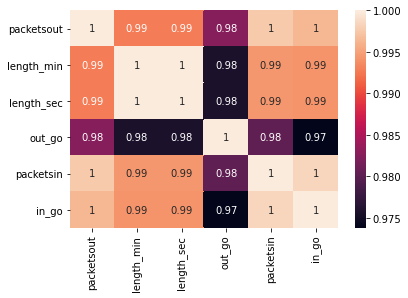

In [7]:
# Correlation heatmap
sns.heatmap(df.corr(), annot = True)

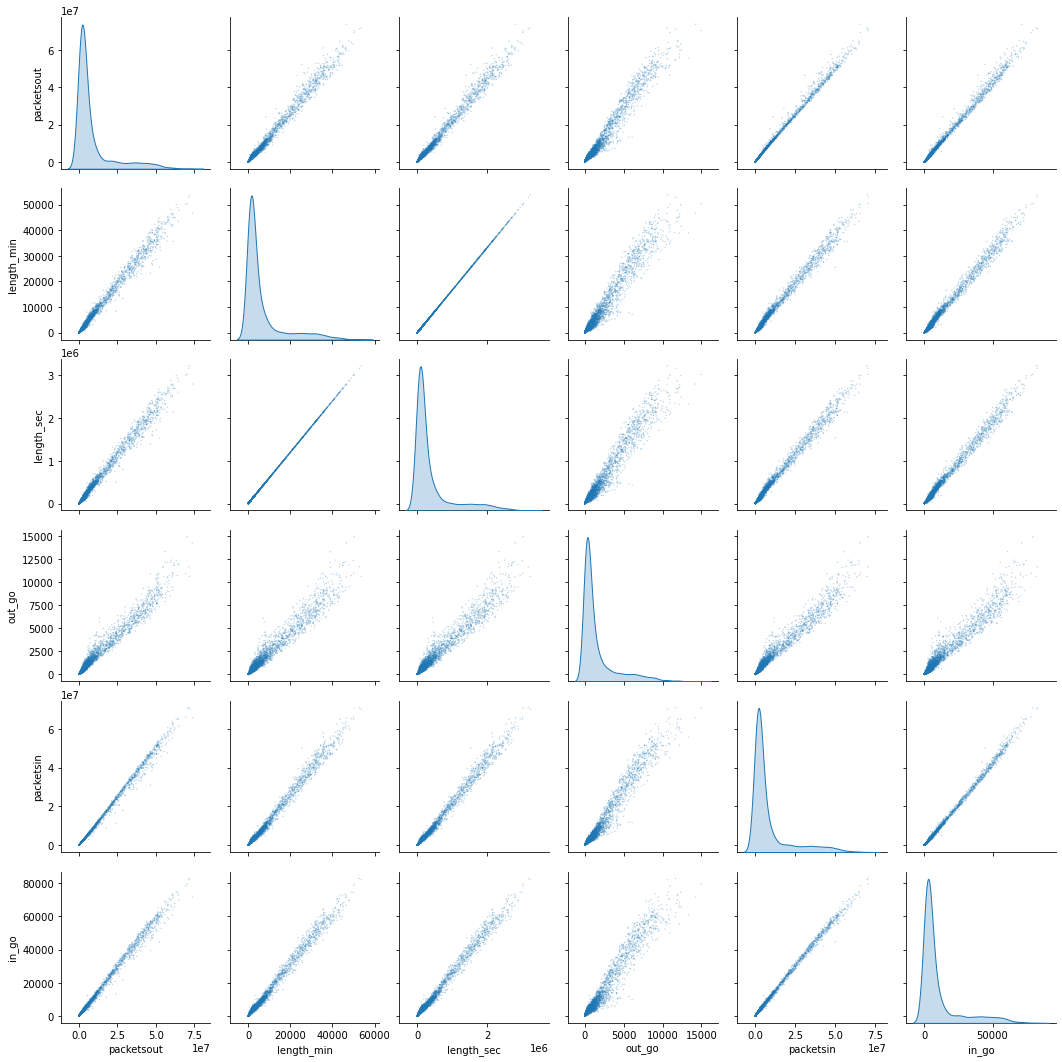

In [8]:
# Pairplot
sns.pairplot(df, diag_kind="kde", plot_kws={'alpha': 0.3, 's': 2, 'edgecolor':'None'})
plt.show()

All the variables are strongly correlated as expected.

### Missing data

The wifi service behind closed and unaccessible from 0AM to 7AM, no data exist for those hours.

From looking at the first few rows of the dataset we can see a day where data is missing. Let's look at it. 

<AxesSubplot:xlabel='hour_end'>

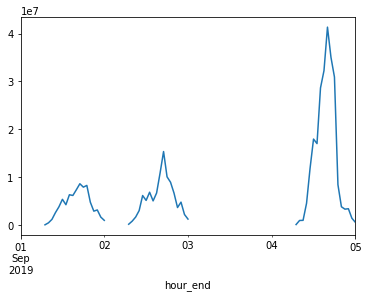

In [9]:
# Plot 4 first days of the dataset
df.asfreq("H").loc['2019-09-01 00:00:00':'2019-09-05 00:00:00', 'packetsout'].plot()

## Time serie analysis



### Pick the variable to predict
I am going to stick with 'packetsout' for now. Which means I am not going to use any other variable as feature for the model.


In [10]:
# Select packetsout only
df = df[['packetsout']]

### Filling missing hours

First thing first: as mentionned before, because the data is an aggregate of every session and there are no session registered from 0AM to 7AM (the service is not accessible during those hours), we need to create those hours in the dataset. We will fill all the values with NaNs first. We might fill those with 0s later on for the modelling.

In [11]:
# add missing hours (01:00 to 06:00), filled with NaNs for now
df = df.asfreq("H")
df

packetsout
hour_end                       
2019-09-01 00:00:00    621622.0
2019-09-01 01:00:00         NaN
2019-09-01 02:00:00         NaN
2019-09-01 03:00:00         NaN
2019-09-01 04:00:00         NaN
...                         ...
2020-04-30 19:00:00   1653341.0
2020-04-30 20:00:00   2670723.0
2020-04-30 21:00:00   2098413.0
2020-04-30 22:00:00   2463489.0
2020-04-30 23:00:00   1066849.0

[5832 rows x 1 columns]

In [12]:
df = df.fillna(0)
df

packetsout
hour_end                       
2019-09-01 00:00:00    621622.0
2019-09-01 01:00:00         0.0
2019-09-01 02:00:00         0.0
2019-09-01 03:00:00         0.0
2019-09-01 04:00:00         0.0
...                         ...
2020-04-30 19:00:00   1653341.0
2020-04-30 20:00:00   2670723.0
2020-04-30 21:00:00   2098413.0
2020-04-30 22:00:00   2463489.0
2020-04-30 23:00:00   1066849.0

[5832 rows x 1 columns]

### Plotting the serie and first observations

<AxesSubplot:xlabel='hour_end'>

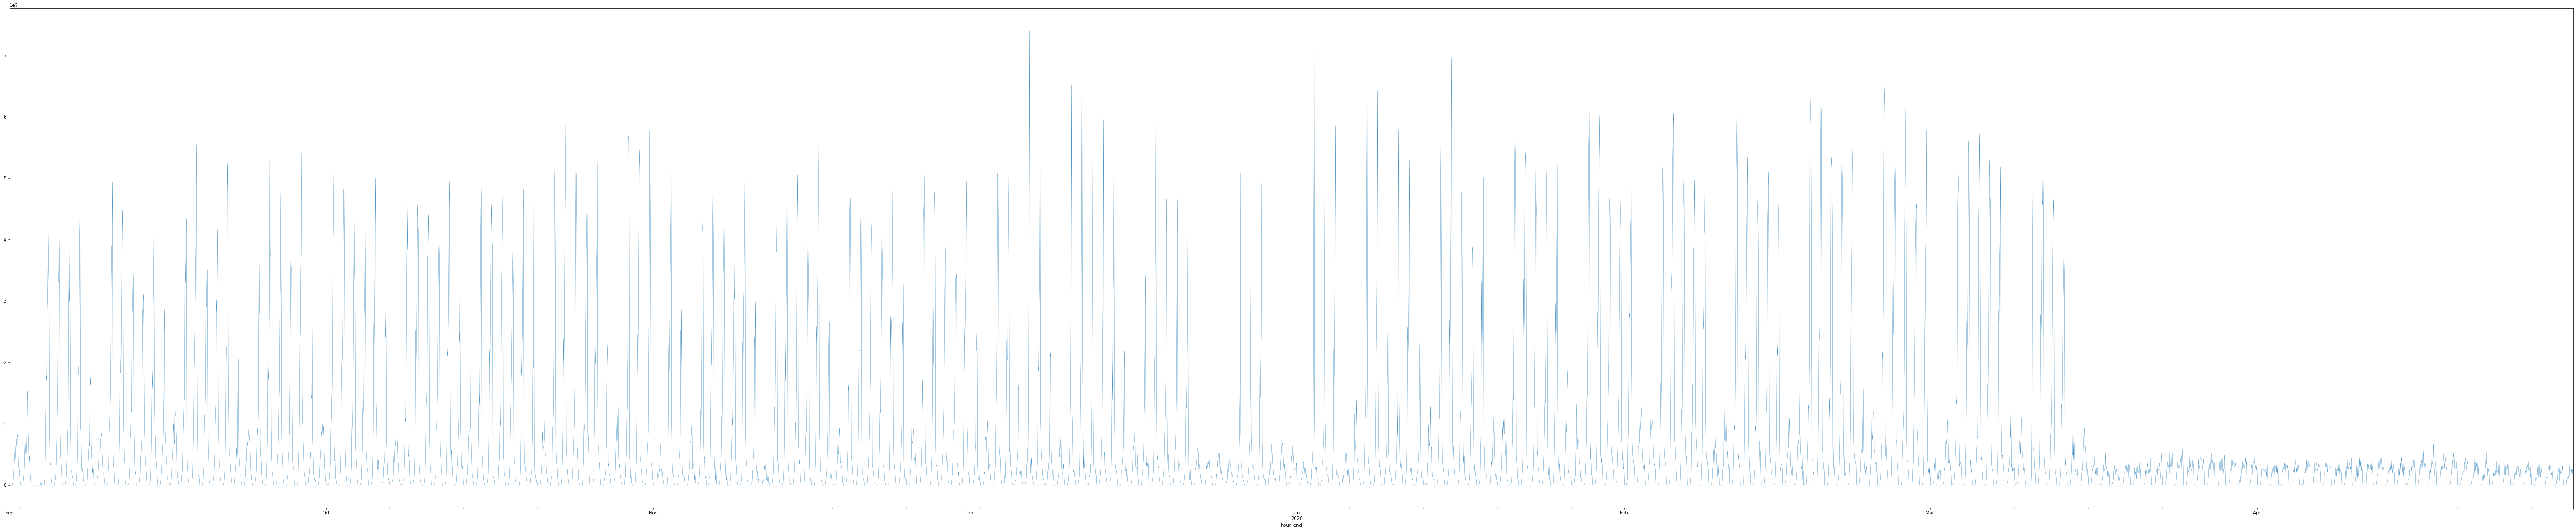

In [13]:
# temporarily set a larger figure size and plot the serie
df['packetsout'].plot(figsize=(100, 20),linewidth=0.4)

Observations:

- Less than one year of data is available. This means that we don't have 2 entire revolutions at our disposal, as it is preferable when it comes to time serie modeling as we want to capture all seasonal patterns. We might prefer considering only models that use most recent data, meaning only using the past seven days to capture daily and weekly paterns (aka. ignoring potential yearly seasonal pattern).
 

- There are 2 obvious periods: before the COVID lockdown mid march and during lockdown, caracterized by a brutal drop in usage of the service. This calls again for a model using only recent data to predict future values. For instance using an ARIMA type of model on the entire dataset will be problematic because of trend issues.
 
 
- The "daily" effect is quite obvious (weekend effect), but seems to be different from one period to another. This raises the question of their incorporation in the model, and how if we do so: in a multiplicative or an additive way? This also is one more reason to only use the second period to train our models.


- The "day of the week" is very visible on the first period of the dataset , not so much on the second period. 


- There is a "special day effect" (bank holiday effect):
    - Should we use a dummy variable for those days? (ARIMAX type of model)
    - Or should we ignore it because it's not really present in the 2nd period? (for instance easter monday on 13/04 is similar to any other monday).

### Seasonal patterns: Daily and weekly effects


In [14]:
# split the df serie in 2 periods per1 and per2, before and after lockdown
per1 = df[:'20200315']
per2 = df['20200316':]

#### Daily effect

Let's look at the average day for each period:

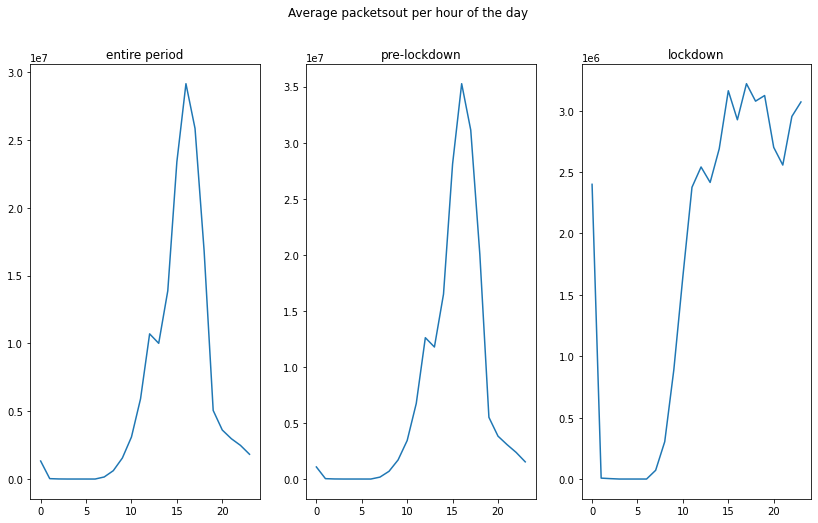

In [15]:
# Average packetsout per hour of the day: entire period, period 1 and period 2
fig = plt.figure(figsize=(14,8))
ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 3), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)

fig.suptitle('Average packetsout per hour of the day')

ax1.plot(df.groupby(df.index.hour).mean())
ax1.set_title('entire period')
ax2.plot(per1.groupby(per1.index.hour).mean())
ax2.set_title('pre-lockdown')
ax3.plot(per2.groupby(per2.index.hour).mean())
ax3.set_title('lockdown')
plt.show()

nb: The positive (non-zero) average for 0AM is an artifact of how the data has been grouped. The data has been grouped on 1 hour bins, and the timestamp used is the end of each session. Even if the wifi service closes at midnight, some sessions ends a bit later, hence the artifact.

This artifact looks more dramatic relatively to the overall lower amount of packets during lockdown, but its net average value is similar to the pre-lockdown period.

#### Day of the week effect

Now let's look at the average day of the week for each period:

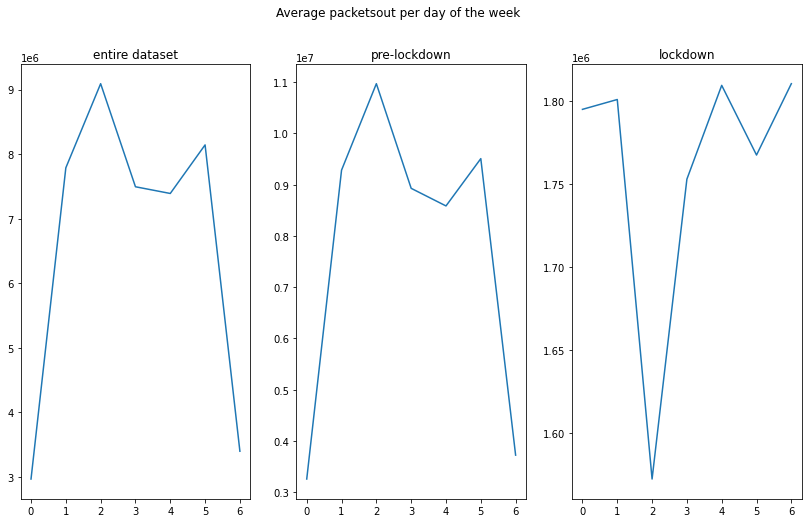

In [16]:
# Average packetsout per day of the week: entire period, period 1 and period 2
# day of the week with Monday=0, Sunday=6

fig = plt.figure(figsize=(14,8))
ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 3), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)

fig.suptitle('Average packetsout per day of the week')

ax1.plot(df.groupby(df.index.weekday).mean())
ax1.set_title('entire dataset')
ax2.plot(per1.groupby(per1.index.weekday).mean())
ax2.set_title('pre-lockdown')
ax3.plot(per2.groupby(per2.index.weekday).mean())
ax3.set_title('lockdown')
plt.show()

### Trend and seasonality decomposition




#### Classical additive decomposition

nb: multiplicative seasonal decomposition is excluded and we have to stick with additive decomposition (we have some values equal to zero corresponding to the hours when the service is inaccessible).


##### Entire dataset

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 8

# Daily seasonal classical decomposition
from statsmodels.tsa.seasonal import seasonal_decompose


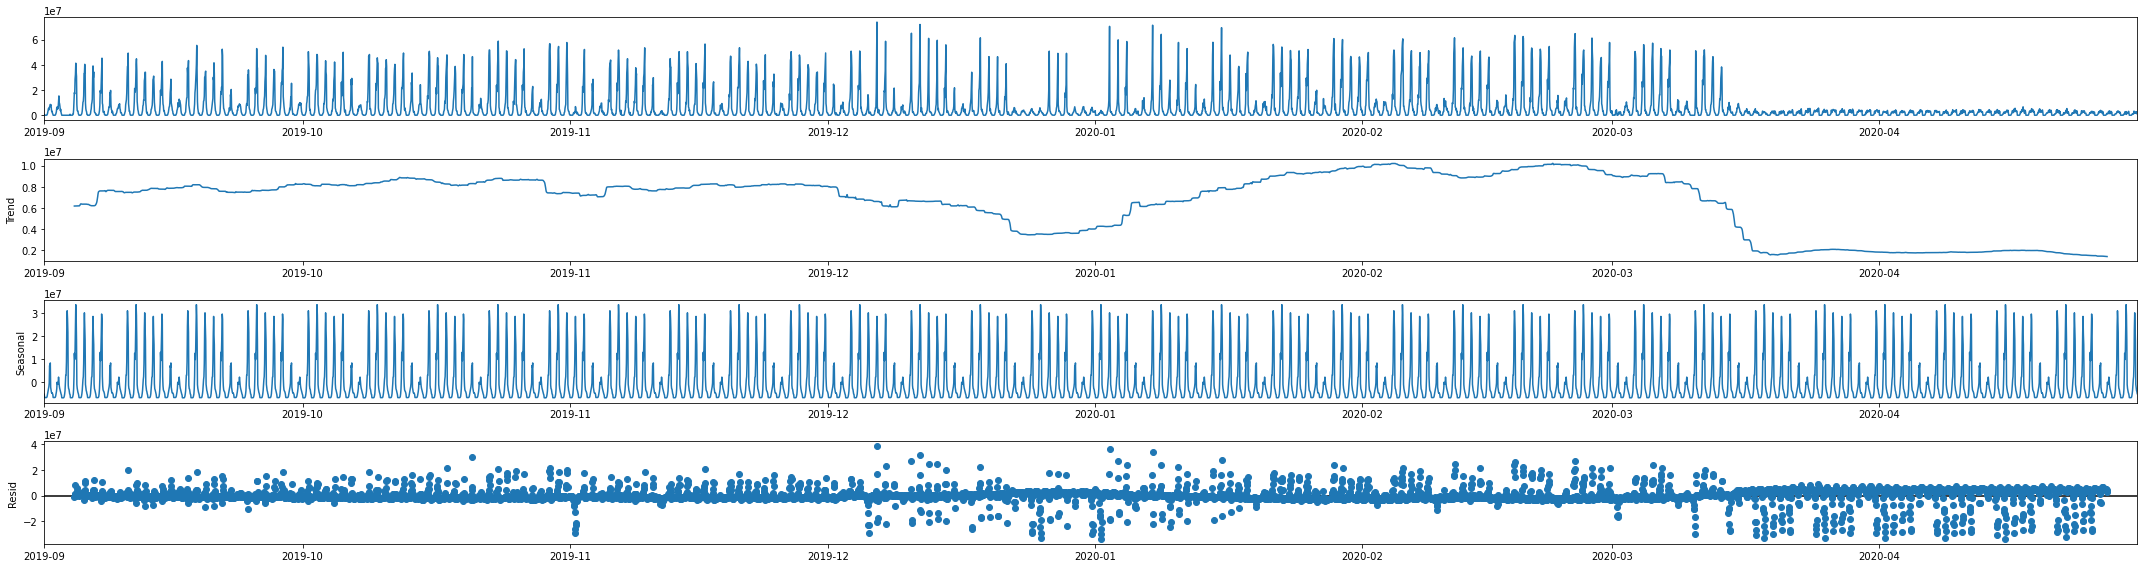

In [18]:
# Weekly seasonal classical decomposition
result = seasonal_decompose(df, model='additive', period=7*24)

result.plot()
plt.show()

##### Period 1: pre-lockdown

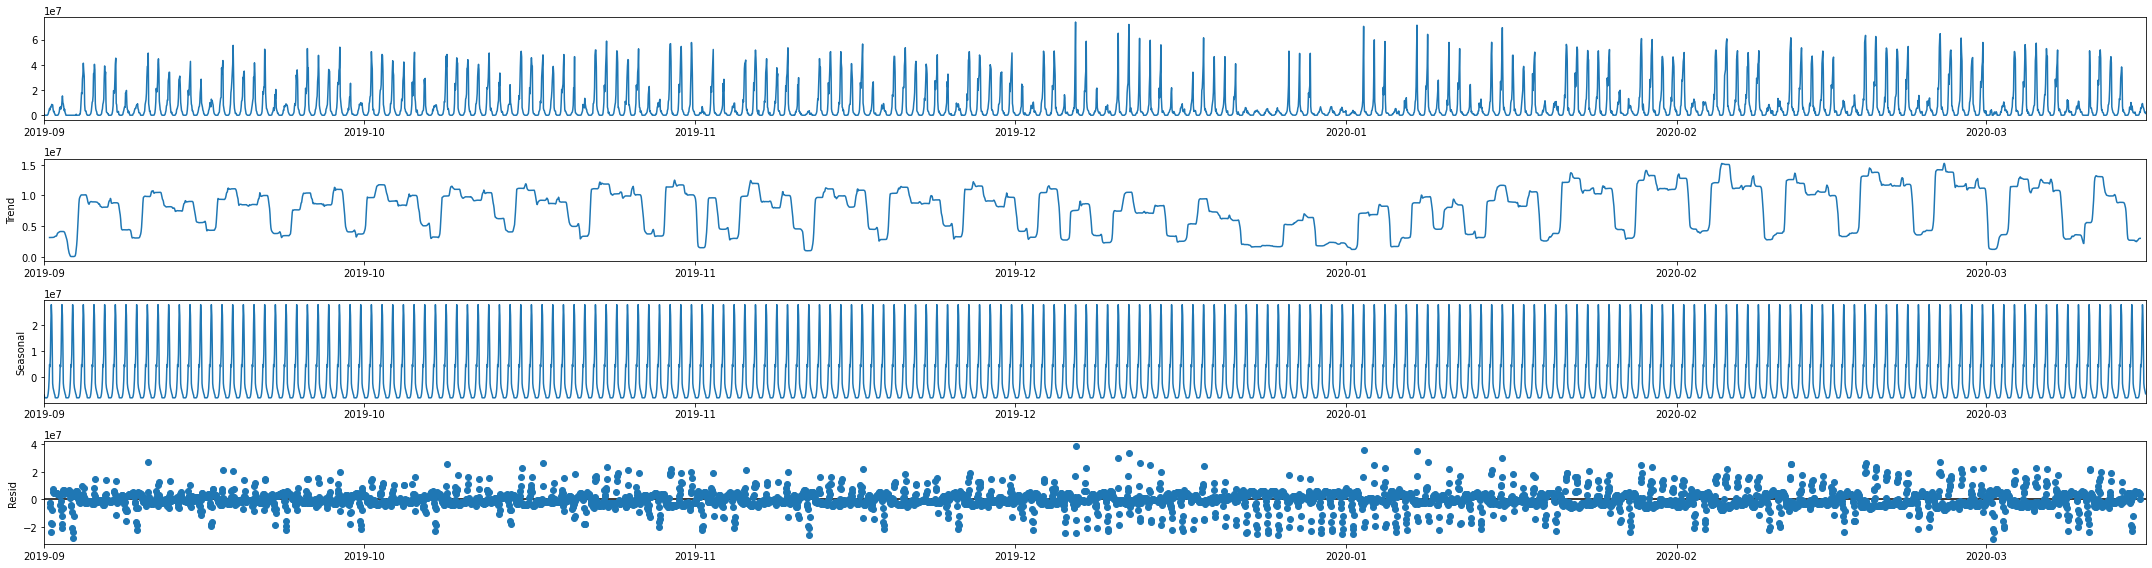

In [19]:
# Daily seasonal classical decomposition
result = seasonal_decompose(per1, model='additive', period=24)

result.plot()
plt.show()

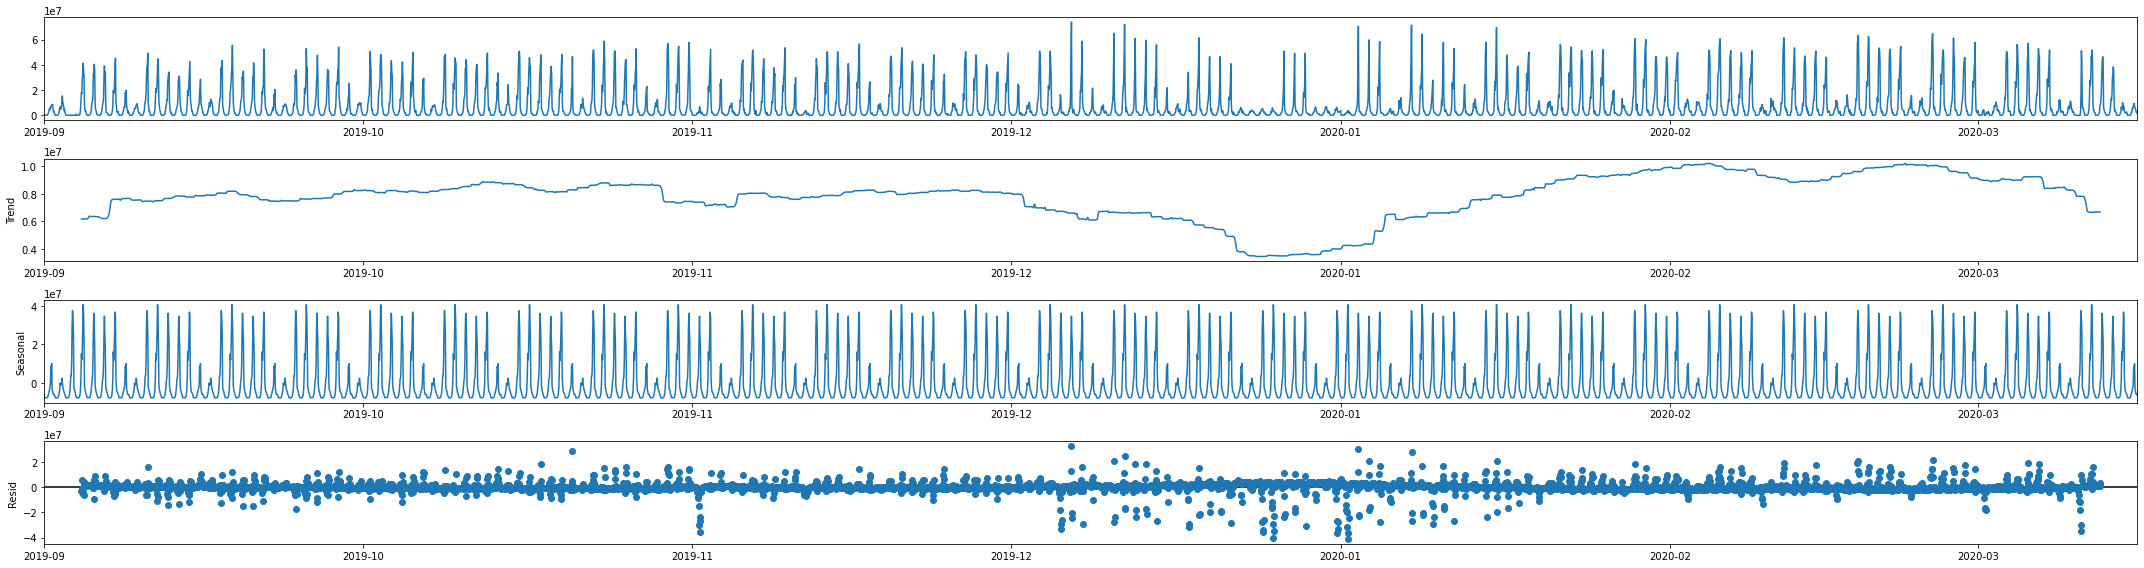

In [20]:
# Weekly seasonal classical decomposition
result = seasonal_decompose(per1, model='additive', period=7*24)

result.plot()
plt.show()

##### Period 2: lockdown

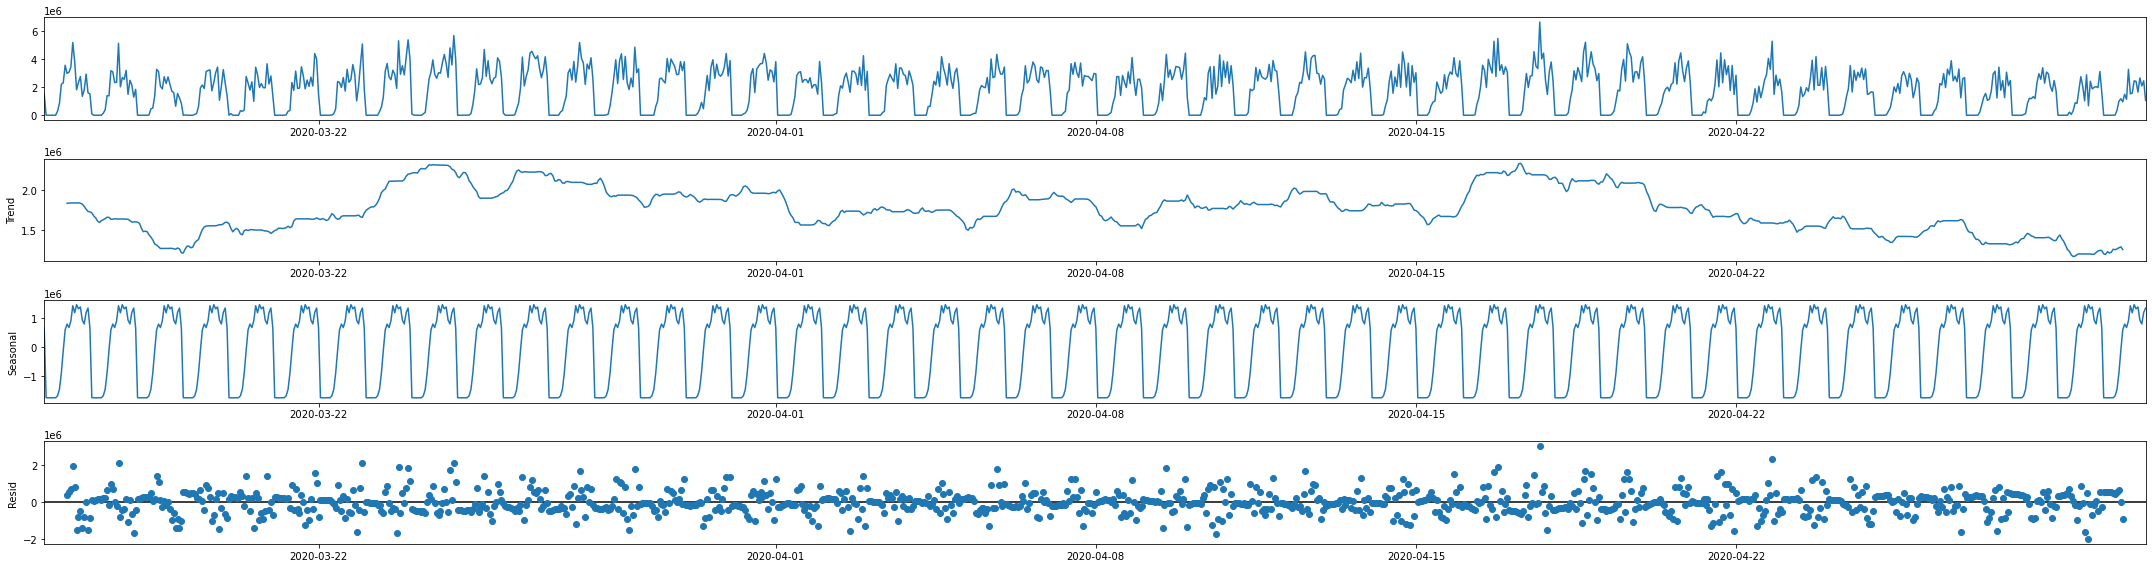

In [21]:
# Daily seasonal classical decomposition
result = seasonal_decompose(per2, model='additive', period=24)

result.plot()
plt.show()

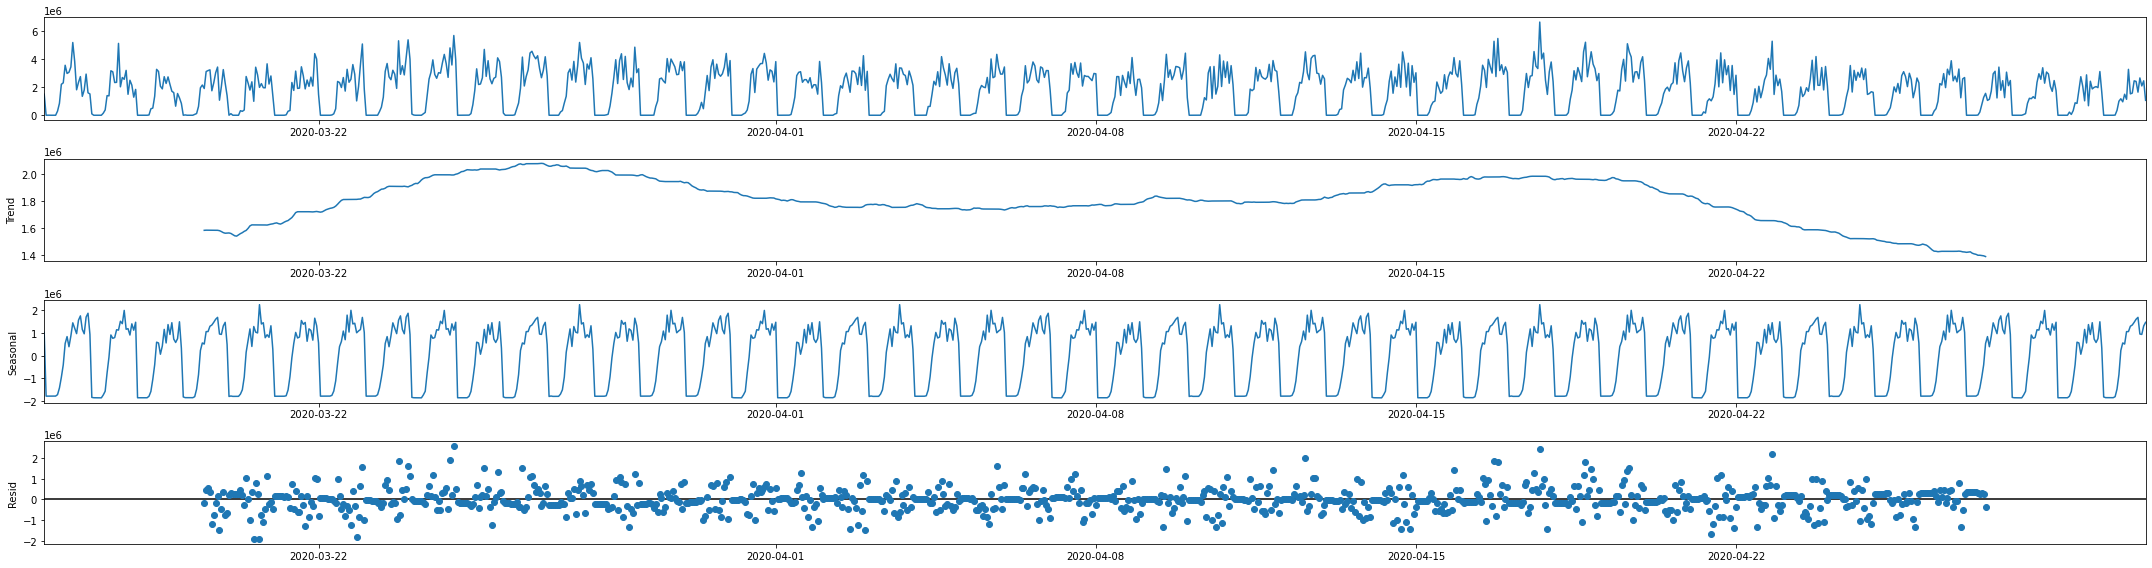

In [22]:
# Weekly seasonal classical decomposition
result = seasonal_decompose(per2, model='additive', period=7*24)

result.plot()
plt.show()

In [23]:
# Reset matplotlib style paramaters: setback figsize to default

plt.rcParams.update(plt.rcParamsDefault)

##### Observations

- We can see that the seasonality is decently but unevenly captured. The residuals are close to zero for the hours when the service is closed.


- Classical decomposition struggles on the entire dataset because of the brutal change between the two periods.


- Weekly frequency is preferable on the first period over naively using daily frequency, as using freq=24 (daily) leaves a clear weekly pattern on the trend component. However it doesn't bring that much for the second period.

## Models

For simplicity sake we will only use the second period to train the model, as we disscussed in 4.3.



The challenge of using only a short period:


- Multiplicative trend models won't be relevant here as we have a lot of observations equal to zero.


- This is a high frequency time serie, with potential multiple seasonal patrerns (complex seasonality).


- We don't have two entire revolutions/years (actually not even an entire year): capturing all potential seasonal pattern will be impossible.


Most of the models below are theorically unable to deal with those seasonal complexities, but they might still produce decent short term predictions if we only use period 2 as training data. We don't have enough data to model those patterns anyway (annual and weekly seasonal patterns).

In [24]:
# train test split per2: test = 10 days or ~20% of per2
train = per2[:'20200420']
test = per2['20200421':]

### Exponential smoothing

Let's try exponential smoothing with daily seasonal pattern:

#### Vanilla Holt's Winters exponential smoothing

In [52]:
# Holt's Winters exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing

holtswinters = ExponentialSmoothing(train, seasonal_periods=24, trend='add', damped_trend=False, seasonal='add').fit()


C:\Users\Nicolas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Nicolas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


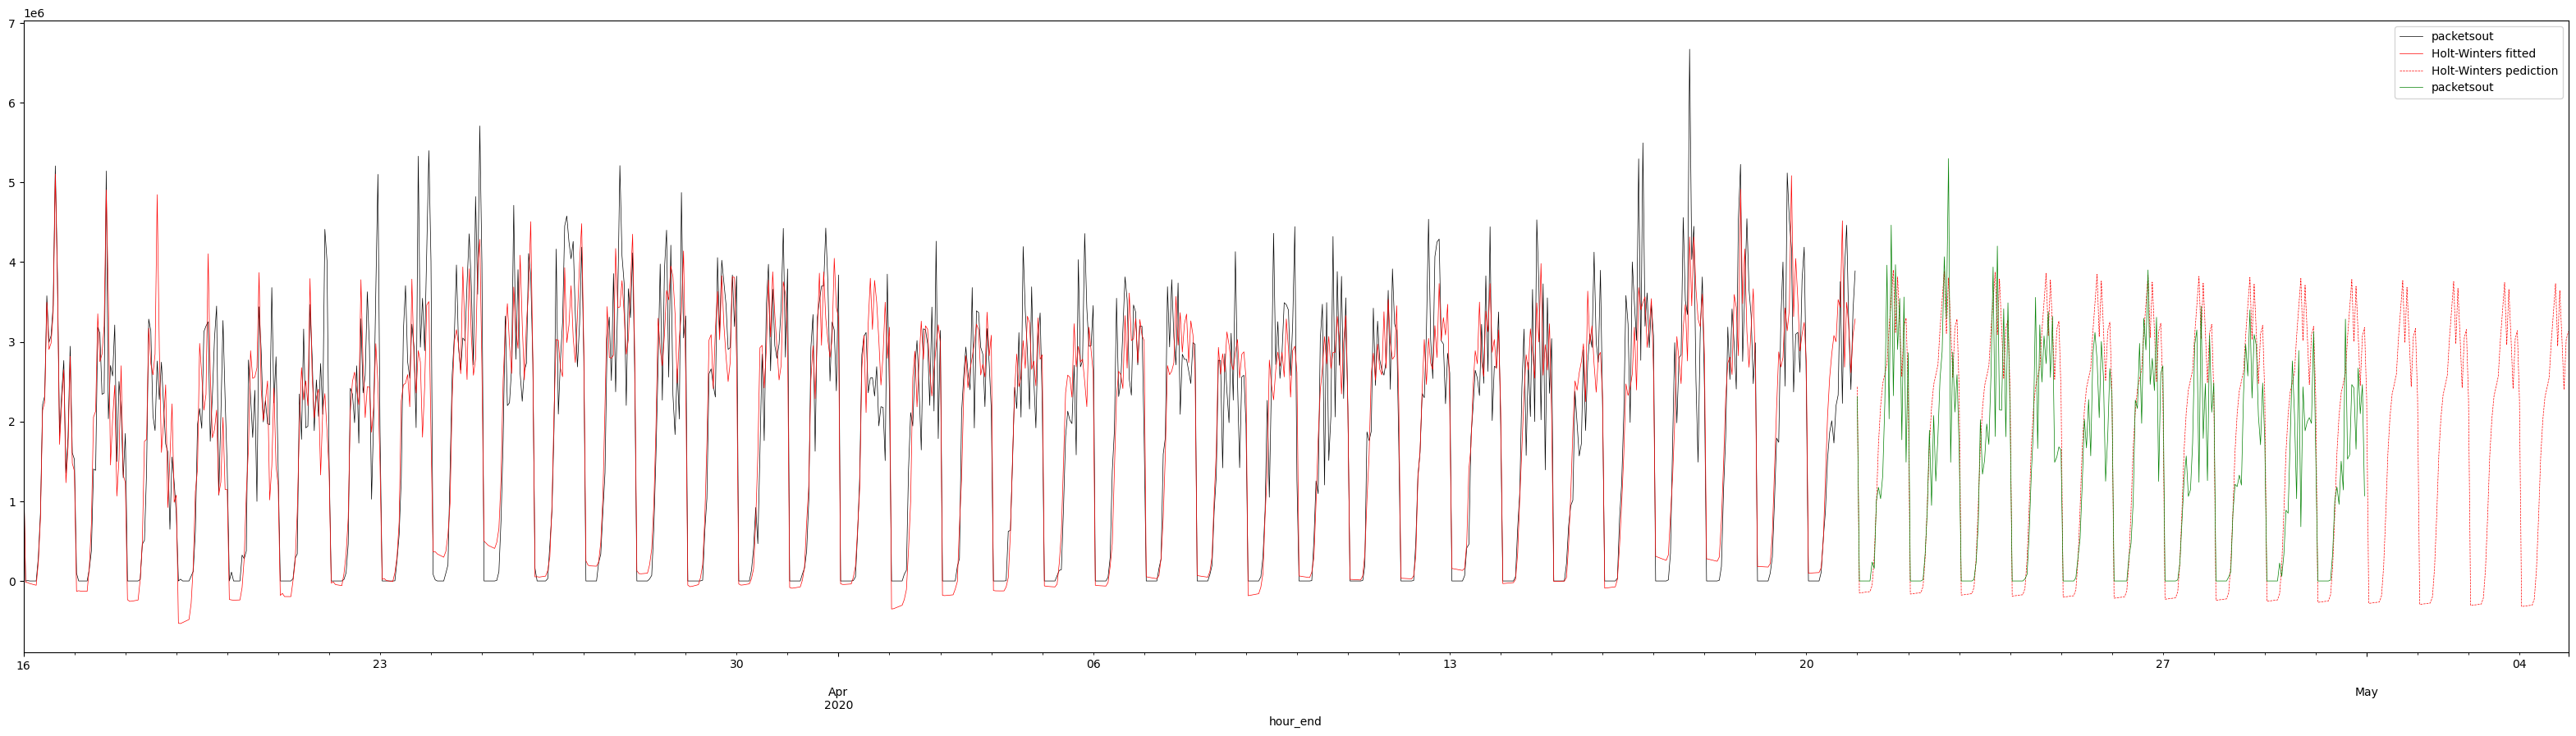

In [26]:
rcParams['figure.figsize'] = 40, 10

ax = train.plot(style='-', color='black', linewidth=0.5)
holtswinters.fittedvalues.rename('Holt-Winters fitted').plot(ax=ax, style='-', color='red', linewidth=0.5, legend=True)
holtswinters.forecast(14*24).rename('Holt-Winters pediction').plot(ax=ax, style='--', color='red', linewidth=0.5, legend=True)
test.plot(ax=ax, style='-', color='green', linewidth=0.5)
plt.show()

Accurate long term predictions will be very complicated, as expected. We can still impove those long term predictions by focusing on this visible trend issue: 

- we can simply remove the trend, but short term predictions will suffer from it.
- we can train the model using a longer seasonal period (a week; 7*24) to smoothen the trend, but it doesn't represent the real seasonal pattern and short term prediction will suffer from it as well.
- we can dampen the trend, this way we will keep its benefits for short term predictions but long term predictions won't suffer as much.

#### Dampened Holt's Winters exponential smoothing

C:\Users\Nicolas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Nicolas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


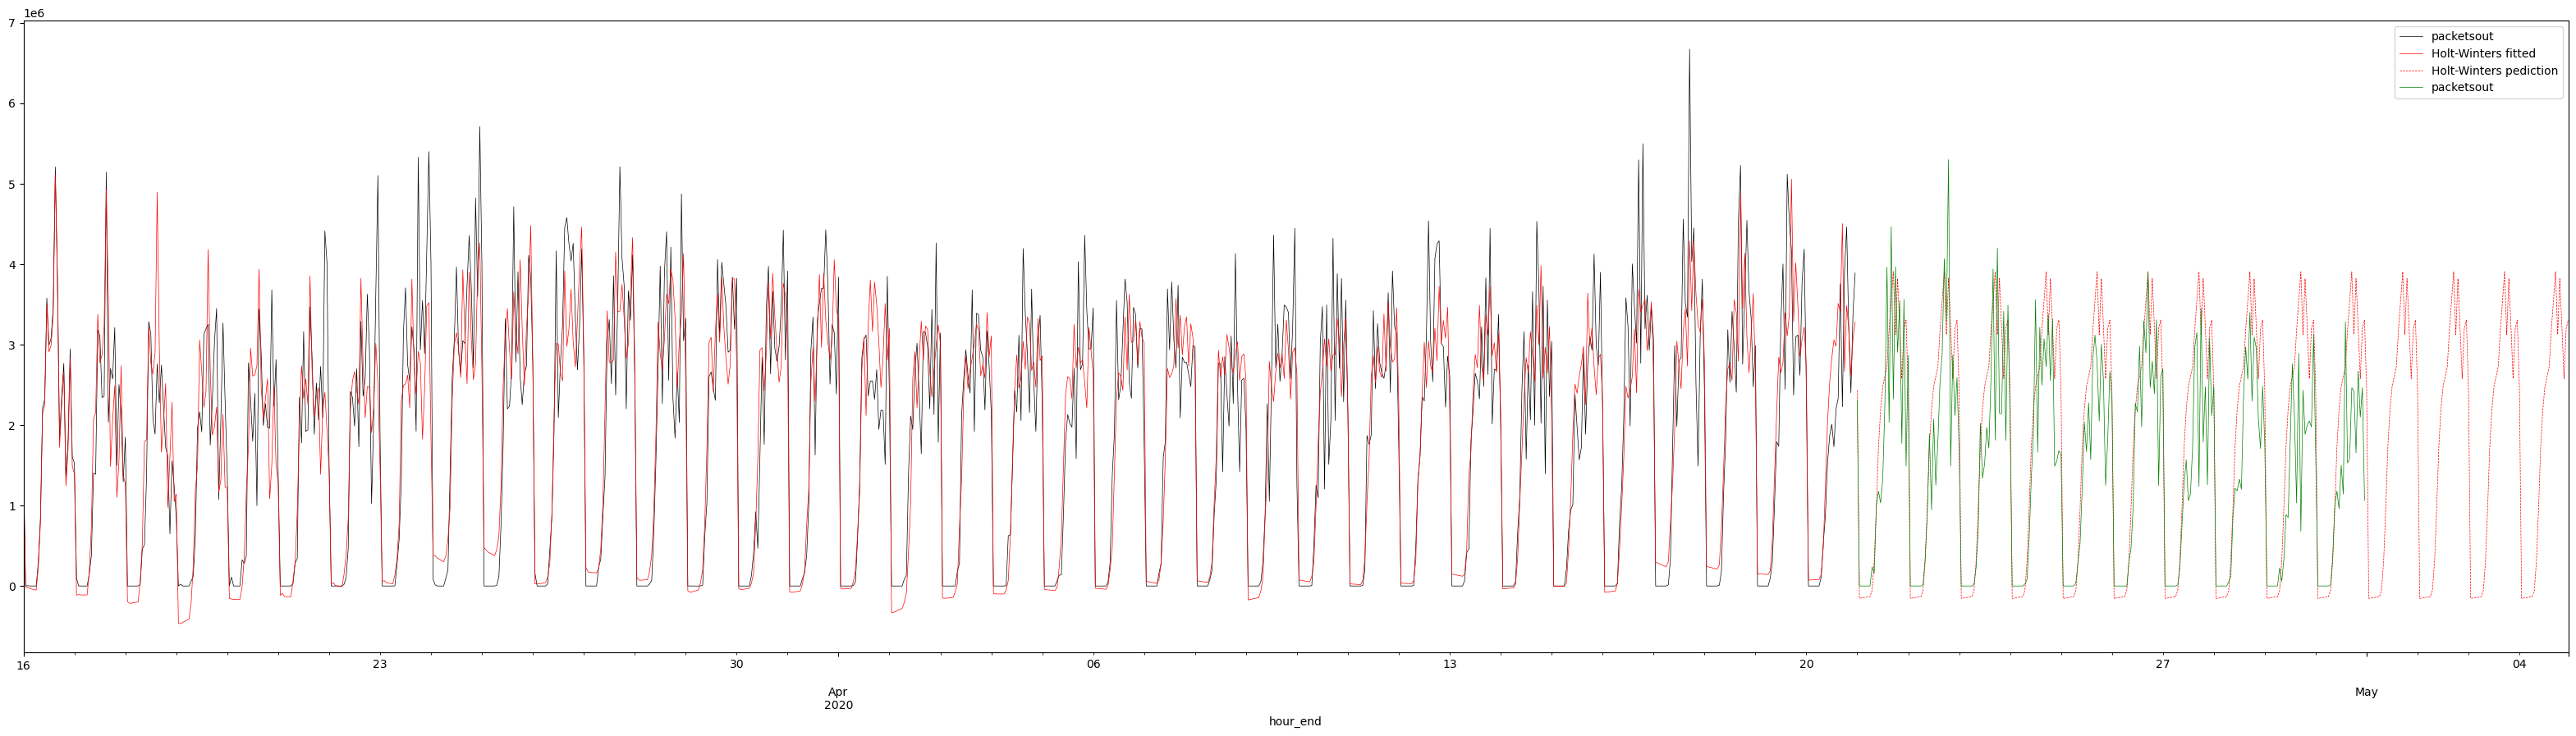

In [27]:
# Holt's Winters exponential smoothing with damped trend
holtswinters_damped = ExponentialSmoothing(train, seasonal_periods=24, trend='add', damped_trend=True, seasonal='add').fit()

# Plot
ax = train.plot(style='-', color='black', linewidth=0.5)
holtswinters_damped.fittedvalues.rename('Holt-Winters fitted').plot(ax=ax, style='-', color='red', linewidth=0.5, legend=True)
holtswinters_damped.forecast(14*24).rename('Holt-Winters pediction').plot(ax=ax, style='--', color='red', linewidth=0.5, legend=True)
test.plot(ax=ax, style='-', color='green', linewidth=0.5)
plt.show()

Dampening the trend seems effective. Let's look at this model in details:

In [28]:
holtswinters_damped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        ExponentialSmoothing Model Results                       
=================================================================================
Dep. Variable:               packetsout   No. Observations:                   864
Model:             ExponentialSmoothing   SSE                 376673468592938.000
Optimized:                         True   AIC                           23213.915
Trend:                         Additive   BIC                           23352.000
Seasonal:                      Additive   AICC                          23216.299
Seasonal Periods:                    24   Date:                  Mon, 15 Mar 2021
Box-Cox:                          False   Time:                          22:32:21
Box-Cox Coeff.:                    None                                          
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0403571                alpha                 True
smoothing_trend                  0.0001                 beta                 True
smoothing_seasonal            0.2741837                gamma                 True
initial_level                2.4699e+06                  l.0                 True
initial_trend                -8533.0558                  b.0                 True
damping_trend                 0.9900000                  phi                 True
initial_seasons.0           -9.6098e+05                  s.0                 True
initial_seasons.1           -2.4699e+06                  s.1                 True
initial_seasons.2           -2.4654e+06                  s.2                 True
initial_seasons.3           -2.4699e+06                  s.3                 True
initial_seasons.4           -2.4699e+06                  s.4                 True
initial_seasons.5           -2.4699e+06                  s.5                 True
initial_seasons.6           -2.4699e+06                  s.6                 True
initial_seasons.7           -2.1764e+06                  s.7                 True
initial_seasons.8           -1.6172e+06                  s.8                 True
initial_seasons.9           -2.5655e+05                  s.9                 True
initial_seasons.10          -1.5026e+05                 s.10                 True
initial_seasons.11           1.1079e+06                 s.11                 True
initial_seasons.12           5.2215e+05                 s.12                 True
initial_seasons.13           6.0671e+05                 s.13                 True
initial_seasons.14           9.8885e+05                 s.14                 True
initial_seasons.15           2.7373e+06                 s.15                 True
initial_seasons.16           1.3849e+06                 s.16                 True
initial_seasons.17          -6.4682e+05                 s.17                 True
initial_seasons.18          -1.1677e+05                 s.18                 True
initial_seasons.19           2.9605e+05                 s.19                 True
initial_seasons.20          -1.1165e+06                 s.20                 True
initial_seasons.21          -6.6488e+05                 s.21                 True
initial_seasons.22           4.7526e+05                 s.22                 True
initial_seasons.23          -8.6384e+05                 s.23                 True
---------------------------------------------------------------------------------
"""

C:\Users\Nicolas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\results.py:169: FutureWarning: slope is deprecated and will be removed after 0.13
  warnings.warn(


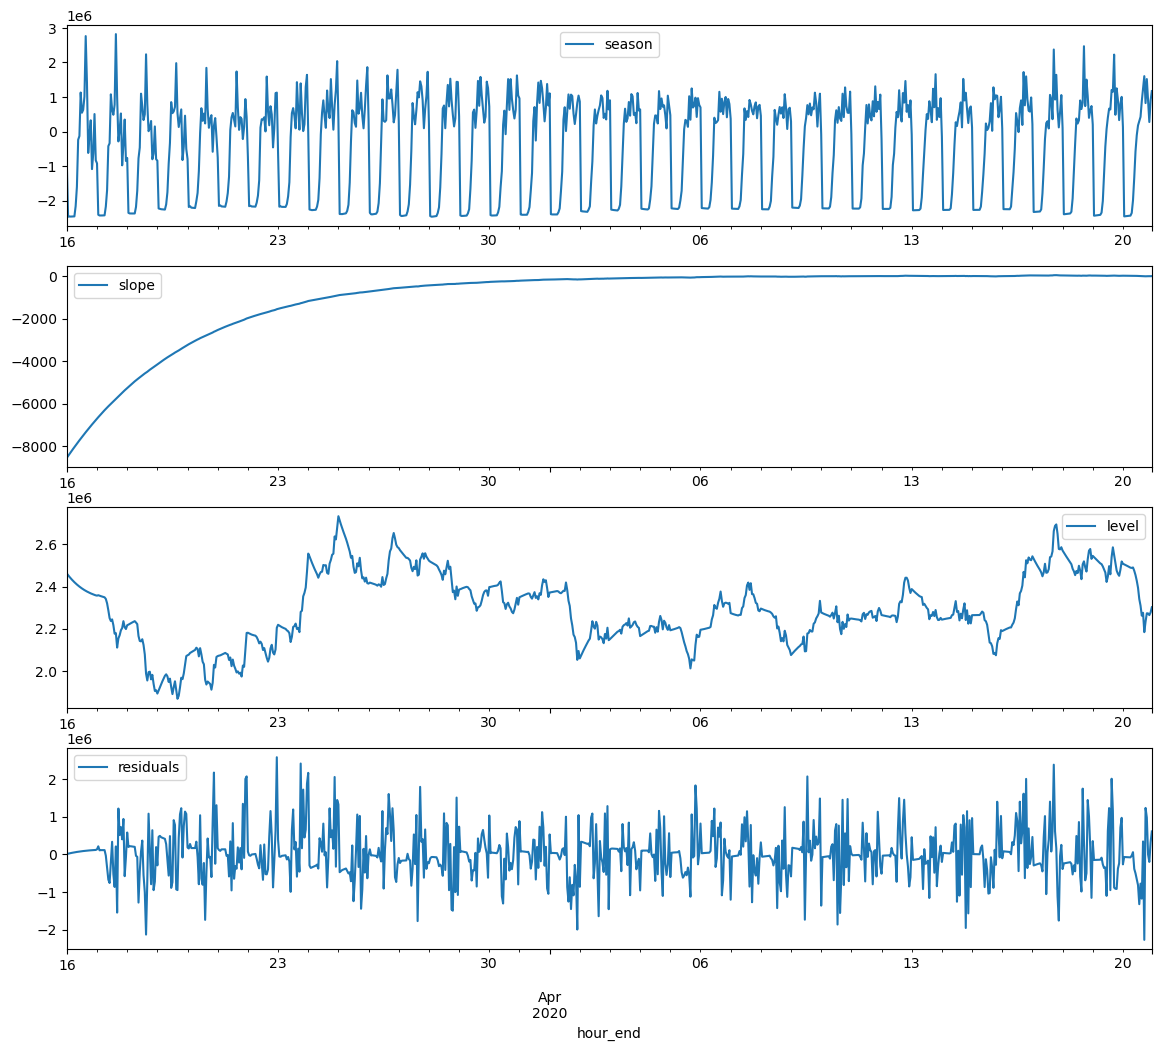

In [29]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize=(14,12))

# plot the different component values that make the fitted values
holtswinters_damped.level.rename('level').plot(ax=ax3, legend=True)
holtswinters_damped.slope.rename('slope').plot(ax=ax2, legend=True)
holtswinters_damped.season.rename('season').plot(ax=ax1, legend=True)
holtswinters_damped.resid.rename('residuals').plot(ax=ax4, legend=True)
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error

#RMSE on 10 days prediction
print('RMSE on 10 days prediction:', mean_squared_error(test, holtswinters_damped.forecast(10*24), squared=False))

#RMSE on 3 days prediction
print('RMSE on 3 days prediction:',mean_squared_error(test[:'20200423'], holtswinters_damped.forecast(3*24), squared=False))

#RMSE on 1 day prediction
print('RMSE on 1 day prediction:',mean_squared_error(test[:'20200421'], holtswinters_damped.forecast(24), squared=False))

RMSE on 10 days prediction: 825190.8574593535
RMSE on 3 days prediction: 785939.5337836095
RMSE on 1 day prediction: 798063.6419961888


The model is performing better on the first few predicted days.

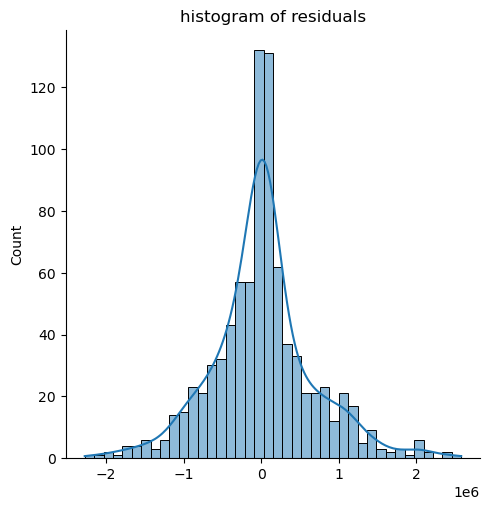

In [31]:
# Reset matplotlib style paramaters: setback figsize to default
plt.rcParams.update(plt.rcParamsDefault)


sns.displot(holtswinters_damped.resid, kde=True)
plt.title("histogram of residuals")
plt.show()

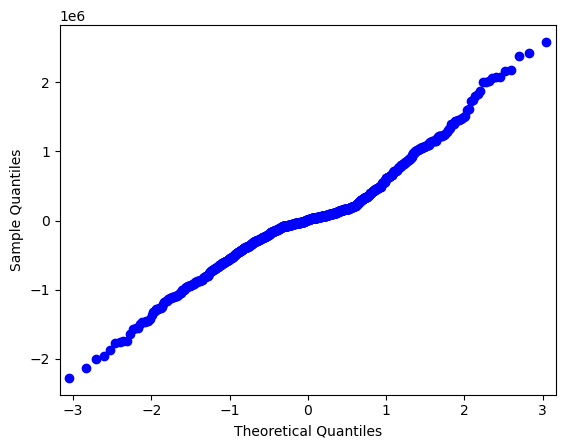

In [32]:
# qq plot of residuals
sm.graphics.qqplot(holtswinters_damped.resid)
plt.show()

[]

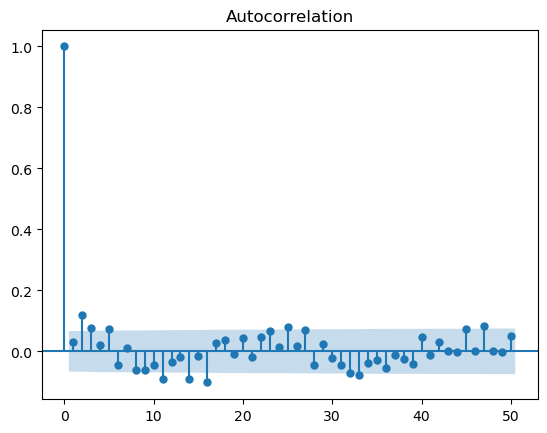

In [33]:
# autocorrelation of residuals
sm.graphics.tsa.plot_acf(holtswinters_damped.resid, lags=50)
plt.plot()

#### Observations and conclusions

- Variance of residuals is unconstant (given the hour of the day: the model predict almost perfectly 'packetsout' when the service is closed) 

- Residuals are not normaly distributed.

### SARIMA


#### ACF, PACF, Hyperparameters

[]

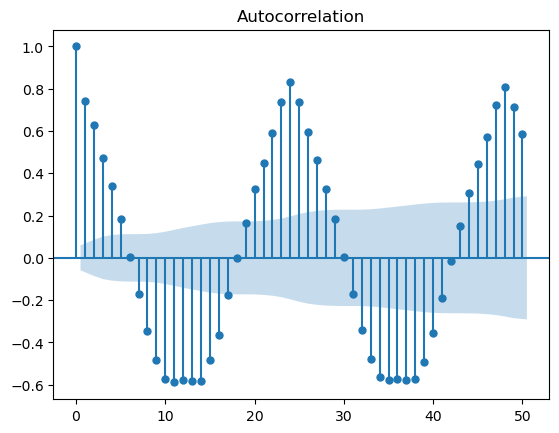

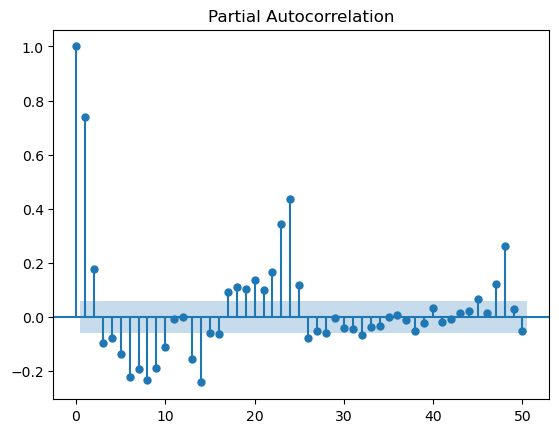

In [34]:
# ACF and PACF plots 
sm.graphics.tsa.plot_acf(per2, lags=50)
sm.graphics.tsa.plot_pacf(per2, lags=50)
plt.plot()

In [35]:
# augmented Dickey-Fuller test: testing for the presence of a unit root
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(per2)

print('p-value =', adf_test[1])


p-value = 0.005727020725771557


H0 is rejected as well as the presence of a unit root.


Nb: unit root tests have low statistical power. However, we are not going to do more statistical testing, as we already know the serie isn't stationary because of a very obvious seasonal pattern.

SARIMA hyperparameters:

- d = 0 : the series has no apparent trend and no positive ACF values out to a high number of lags 
- p =
- q =
- S = 24 : daily seasonal pattern: 24 hours cycle
- D =
- P = >1
- Q =

#### Auto SARIMA

We are going to use pmdarima which is similare to R's auto.arima() function.
This is basically a way of using gridsearch to find the best hyperparameters for our SARIMA model.

In [36]:
# autoarima
import pmdarima as pm

sarima = pm.auto_arima(train, 
                       d=0,
                       max_p=2, start_p=1,
                       max_q=2, start_q=1,
                       seasonal=True, D=1, m=24,
                       max_P=2, start_P=1,
                       max_Q=2, start_Q=1,
                       trace=True, error_action='ignore',
                       suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(1,1,1,24) [intercept=True]; AIC=24984.450, BIC=25012.851, Time=4.230 seconds
Fit ARIMA(0,0,0)x(0,1,0,24) [intercept=True]; AIC=25247.610, BIC=25257.077, Time=0.161 seconds
Fit ARIMA(1,0,0)x(1,1,0,24) [intercept=True]; AIC=25096.163, BIC=25115.097, Time=1.465 seconds
Fit ARIMA(0,0,1)x(0,1,1,24) [intercept=True]; AIC=25012.889, BIC=25031.822, Time=1.626 seconds
Fit ARIMA(0,0,0)x(0,1,0,24) [intercept=False]; AIC=25245.949, BIC=25250.682, Time=0.105 seconds
Fit ARIMA(1,0,1)x(0,1,1,24) [intercept=True]; AIC=24982.827, BIC=25006.494, Time=2.878 seconds
Fit ARIMA(1,0,1)x(0,1,0,24) [intercept=True]; AIC=25242.107, BIC=25261.041, Time=0.734 seconds
Fit ARIMA(1,0,1)x(0,1,2,24) [intercept=True]; AIC=24984.330, BIC=25012.730, Time=8.258 seconds
Fit ARIMA(1,0,1)x(1,1,0,24) [intercept=True]; AIC=25077.712, BIC=25101.379, Time=3.167 seconds
Fit ARIMA(1,0,1)x(1,1,2,24) [intercept=True]; AIC=24983.695, BIC=25016.829, Time=13.096 seconds
Fit A

In [37]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  864
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 24)   Log Likelihood              -12480.628
Date:                            Mon, 15 Mar 2021   AIC                          24973.255
Time:                                    22:33:49   BIC                          25001.656
Sample:                                         0   HQIC                         24984.140
                                            - 864                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1413.5969   4817.103     -0.293      0.769   -1.09e+04    8027.751
ar.L1          0.6241      0.135      4.620      0.000       0.359       0.889
ar.L2          0.1430      0.053      2.682      0.007       0.038       0.247
ma.L1         -0.5572      0.140     -3.988      0.000      -0.831      -0.283
ma.S.L24      -0.7232      0.032    -22.687      0.000      -0.786      -0.661
sigma2      6.483e+11      0.000   5.05e+15      0.000    6.48e+11    6.48e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                94.11
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.40
Prob(H) (two-sided):                  0.94   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.05e+31. Standard errors may be unstable.
"""

In [38]:
# let's retrain the model with Statsmodels for consistency sake, as pmdarima is different in the way of accessing results of the model
sarima = sm.tsa.statespace.SARIMAX(endog=train, order=(2, 0, 1), seasonal_order=(0,1,1,24)).fit()


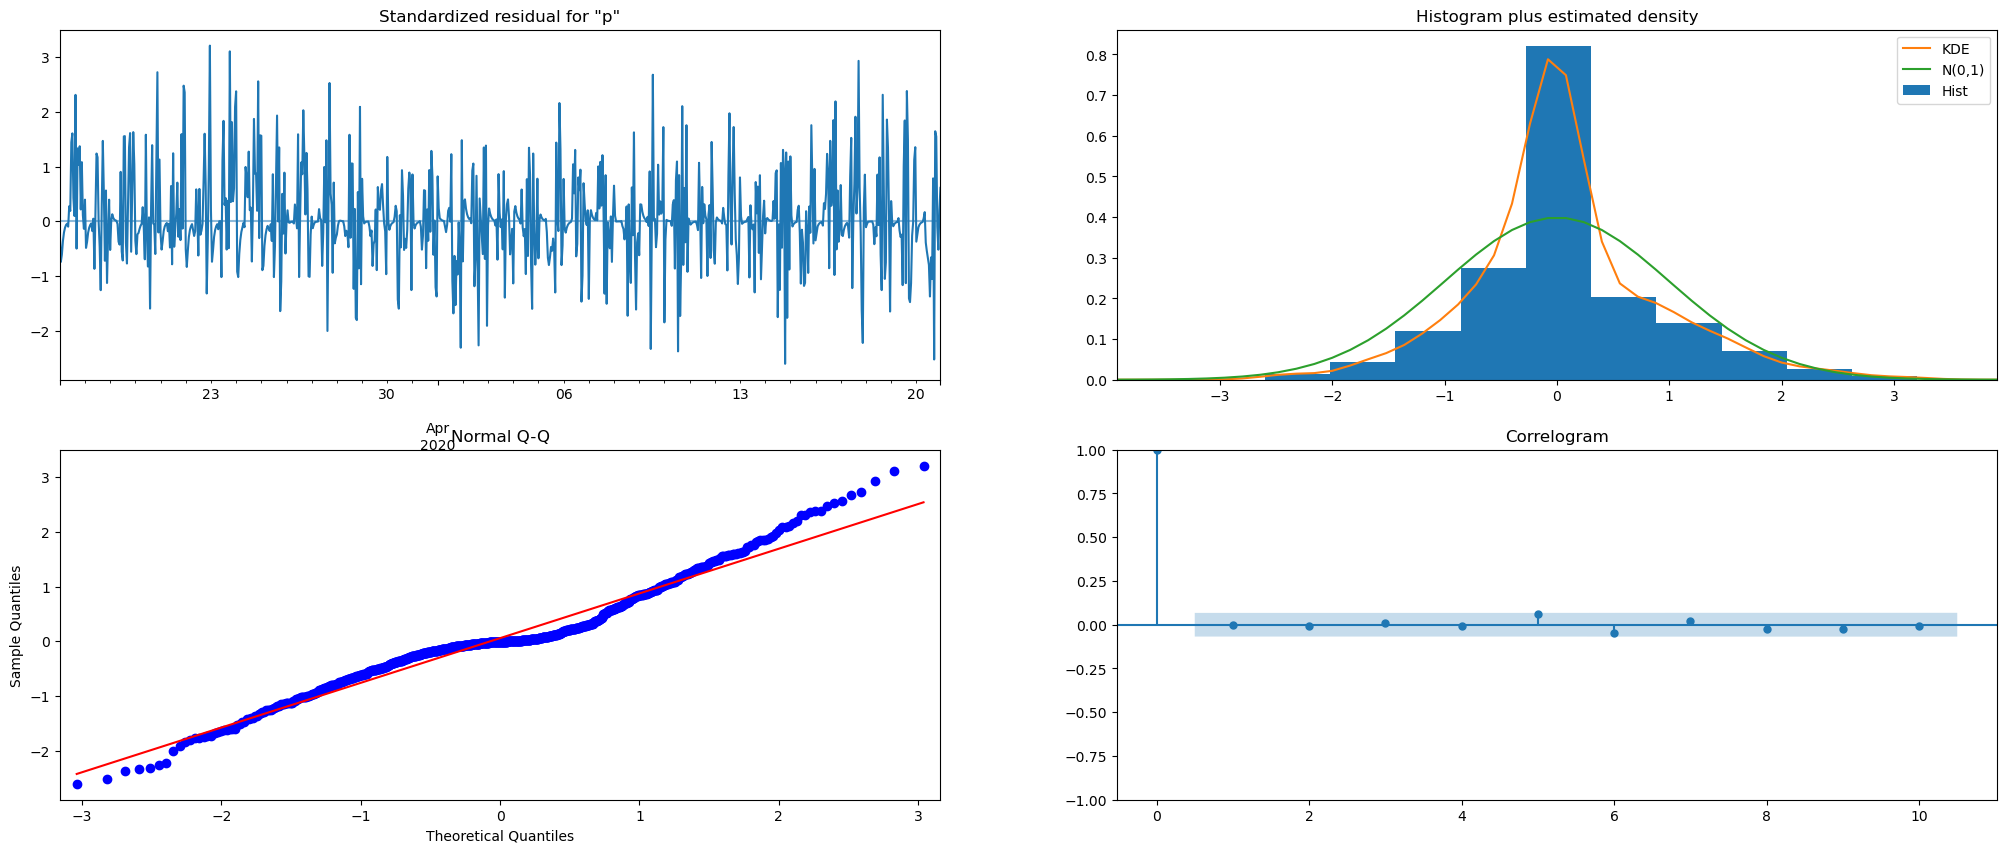

In [39]:
sarima.plot_diagnostics(figsize=(25,10))
plt.show()

In [40]:
#RMSE on 10 days prediction
print('RMSE on 10 days prediction:', mean_squared_error(test, sarima.forecast(10*24), squared=False))

#RMSE on 3 days prediction
print('RMSE on 3 days prediction:',mean_squared_error(test[:'20200423'], sarima.forecast(3*24), squared=False))

#RMSE on 1 day prediction
print('RMSE on 1 day prediction:',mean_squared_error(test[:'20200421'], sarima.forecast(24), squared=False))

RMSE on 10 days prediction: 885461.0101404083
RMSE on 3 days prediction: 830917.9405825352
RMSE on 1 day prediction: 849118.8610268201


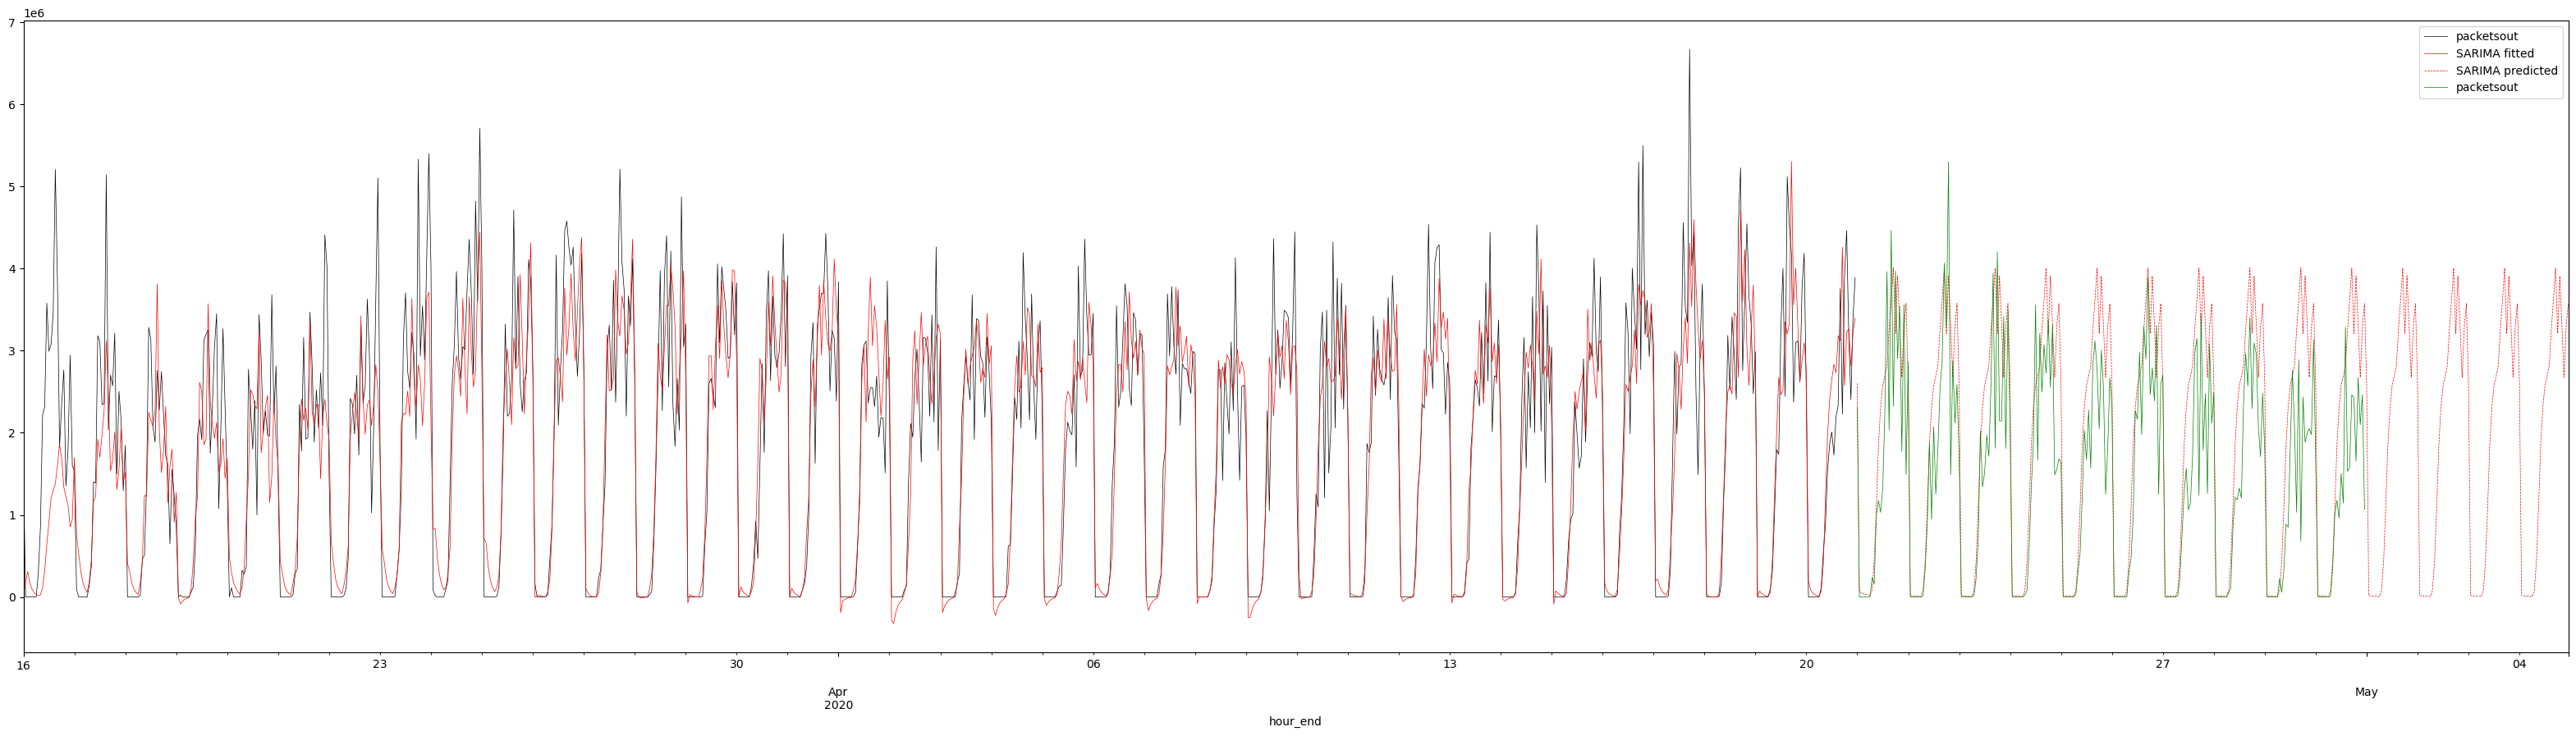

In [41]:
rcParams['figure.figsize'] = 40, 10

# Plot
ax = train.plot(style='-', color='black', linewidth=0.5)
sarima.fittedvalues.rename('SARIMA fitted').plot(ax=ax, style='-', color='red', linewidth=0.5, legend=True)
sarima.forecast(14*24).rename('SARIMA predicted').plot(ax=ax, style='--', color='red', linewidth=0.5, legend=True)
test.plot(ax=ax, style='-', color='green', linewidth=0.5)
plt.show()

#### Observations

SARIMA is not doing any better at first glance, it is actually doing slightly worse given the AIC and the various calculated RMSEs. 

SARIMA performs moderately for similar reasons as exponential smoothing. It's however hard to tell if exponential smoothing is really better, as both models are very 'naive' given the complexity of the serie.

### Facebook Prophet

https://www.kaggle.com/robikscube/time-series-forecasting-with-prophet

A brief quote from the documentation as a potential disclamer about Facebook Prophet: 

"It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well."

In [42]:
# Shape the data to Prophet input format

# train for lockdown period
Prophet_train_per2 = pd.DataFrame({'ds': train.index ,
                                   'y': train['packetsout'] }).reset_index(drop=True)

# test for lockdown period
Prophet_test_per2 = pd.DataFrame({'ds': test.index ,
                                   'y': test['packetsout'] }).reset_index(drop=True)

# Full DataFrame (2 periods)
Prophet_df = pd.DataFrame({'ds': df.index ,
                                   'y': df['packetsout'] }).reset_index(drop=True)

df_train = df[:'20200420']
df_test = df['20200421':]

# train for full dataset modeling
Prophet_train_df = pd.DataFrame({'ds': df_train.index ,
                                   'y': df_train['packetsout'] }).reset_index(drop=True)

#test for full dataset modeling
Prophet_test_df = pd.DataFrame({'ds': df_test.index ,
                                   'y': df_test['packetsout'] }).reset_index(drop=True)

In [43]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


#### Out-of-the-box Prophet trained on the lockdown period only

https://facebook.github.io/prophet/docs/quick_start.html

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


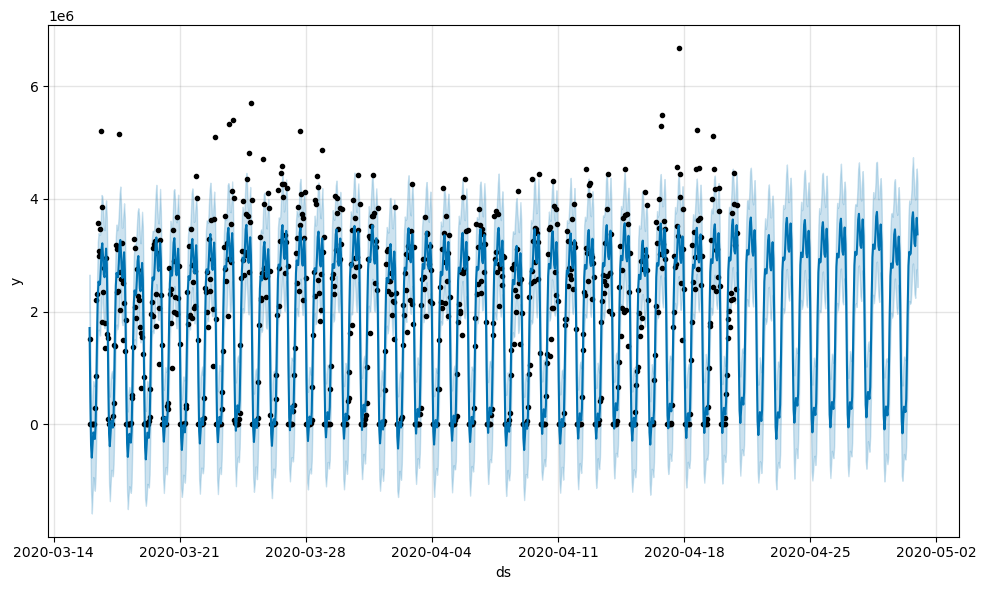

In [44]:
# train prophet on lockdown period data
m_Prophet_per2 = Prophet()
m_Prophet_per2.fit(Prophet_train_per2)

# prediction
m_Prophet_per2_future = m_Prophet_per2.make_future_dataframe(periods=240, freq='H')

# Plot predicted values
m_Prophet_per2_forecast = m_Prophet_per2.predict(m_Prophet_per2_future)

m_Prophet_per2.plot(m_Prophet_per2_forecast) 
plt.show()


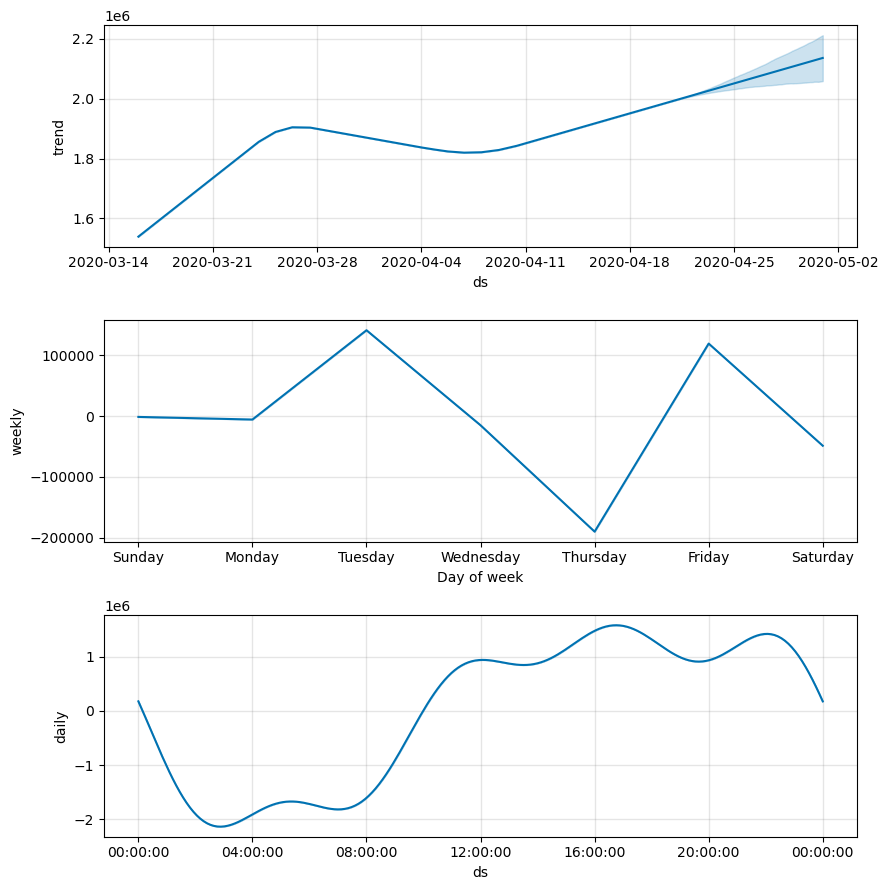

In [45]:
#Components
m_Prophet_per2.plot_components(m_Prophet_per2_forecast)
plt.show()

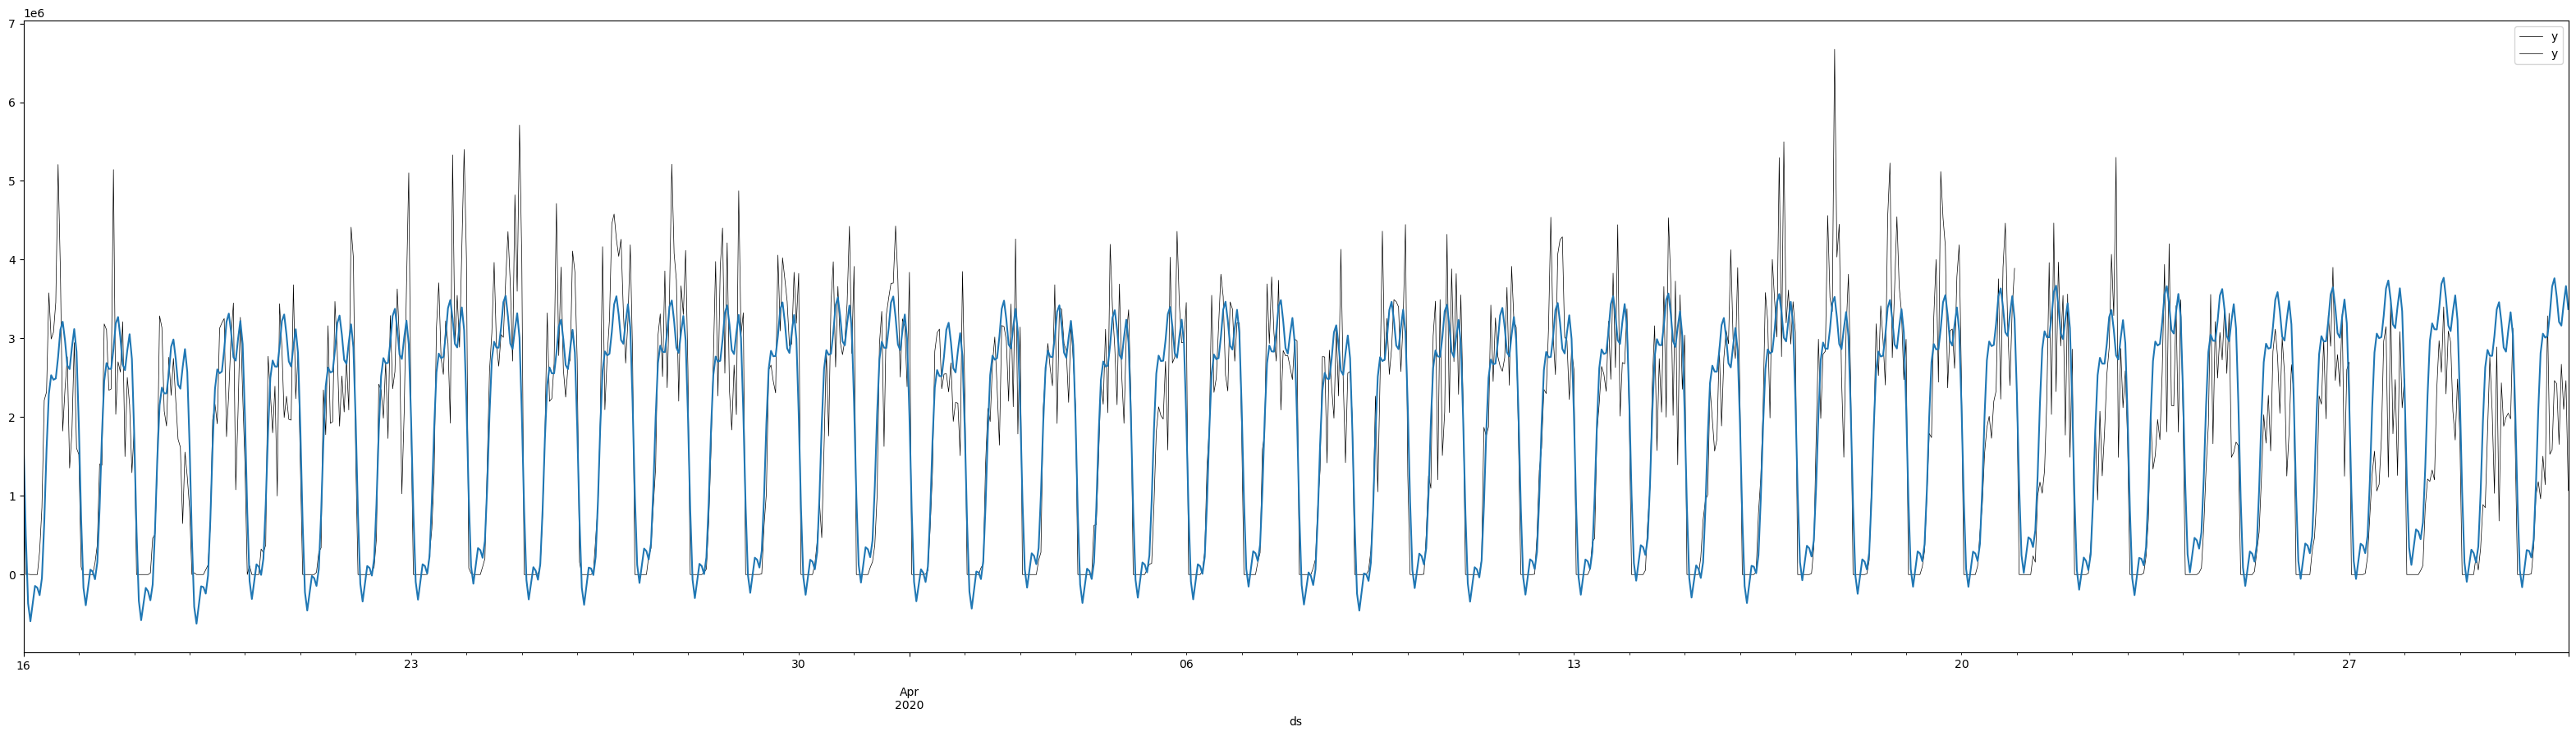

In [46]:
# Plot predicted vs actual
ax = Prophet_train_per2.set_index('ds').plot(style='-', color='black', linewidth=0.5)
Prophet_test_per2.set_index('ds').plot(ax=ax, style='-', color='black', linewidth=0.5)
m_Prophet_per2_forecast.set_index('ds')['yhat'].plot(ax=ax)
plt.show()

In [47]:
#RMSE on 10 days prediction
print('RMSE on 10 days prediction:', mean_squared_error(Prophet_test_per2.set_index('ds')['y'], m_Prophet_per2_forecast.set_index('ds')['yhat'].loc['20200421':], squared=False))

#RMSE on 3 days prediction
print('RMSE on 3 days prediction:',mean_squared_error(Prophet_test_per2.set_index('ds')['y'].loc[:'20200423'], m_Prophet_per2_forecast.set_index('ds')['yhat'].loc['20200421':'20200423'], squared=False))

#RMSE on 1 day prediction
print('RMSE on 1 day prediction:',mean_squared_error(Prophet_test_per2.set_index('ds')['y'].loc['20200421'], m_Prophet_per2_forecast.set_index('ds')['yhat'].loc['20200421'], squared=False))

RMSE on 10 days prediction: 937407.1003646055
RMSE on 3 days prediction: 872450.1376750026
RMSE on 1 day prediction: 926385.0080898887


#### Prophet without Weekly seasonality

The Out-of-the-box model uses weekly seasonality, let's try without it for a more naive model:

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


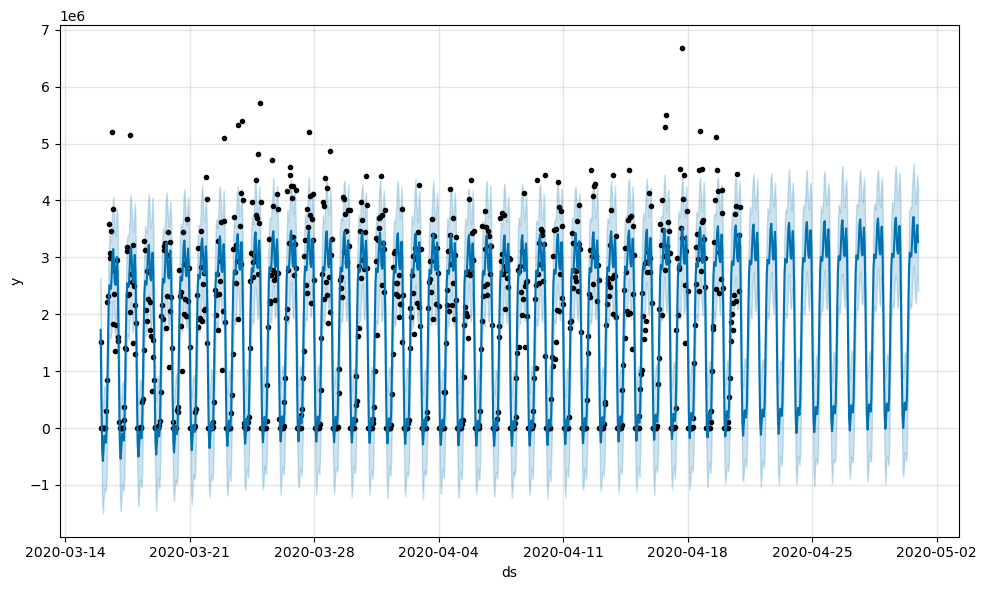

In [48]:
# train prophet on lockdown period data
m_Prophet_per2_naive = Prophet(weekly_seasonality=False)
m_Prophet_per2_naive.fit(Prophet_train_per2)

# prediction
m_Prophet_per2_future_naive = m_Prophet_per2_naive.make_future_dataframe(periods=240, freq='H')

# Plot predicted values
m_Prophet_per2_forecast_naive = m_Prophet_per2_naive.predict(m_Prophet_per2_future_naive)

m_Prophet_per2.plot(m_Prophet_per2_forecast_naive) 
plt.show()

In [49]:
#RMSE on 10 days prediction
print('RMSE on 10 days prediction:', mean_squared_error(Prophet_test_per2.set_index('ds')['y'], m_Prophet_per2_forecast_naive.set_index('ds')['yhat'].loc['20200421':], squared=False))

#RMSE on 3 days prediction
print('RMSE on 3 days prediction:', mean_squared_error(Prophet_test_per2.set_index('ds')['y'].loc[:'20200423'], m_Prophet_per2_forecast_naive.set_index('ds')['yhat'].loc['20200421':'20200423'], squared=False))

#RMSE on 1 day prediction
print('RMSE on 1 day prediction:', mean_squared_error(Prophet_test_per2.set_index('ds')['y'].loc['20200421'], m_Prophet_per2_forecast_naive.set_index('ds')['yhat'].loc['20200421'], squared=False))

RMSE on 10 days prediction: 944920.239578777
RMSE on 3 days prediction: 877309.1811316144
RMSE on 1 day prediction: 872924.7206123711


A more naive Prophet model without the added complexity of weekly seasonality performs better.  

#### Out-of-the-box Prophet trained on the entire dataset

Prophet being "robust to [...] shifts in the trend", we can try to train the model on the entire dataset.

Prophet has the ability to detect "changepoints' on the dataset, but we can also set those points. This might allow us to successfully train the model on the entire dataset including the pre-lockdown period.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


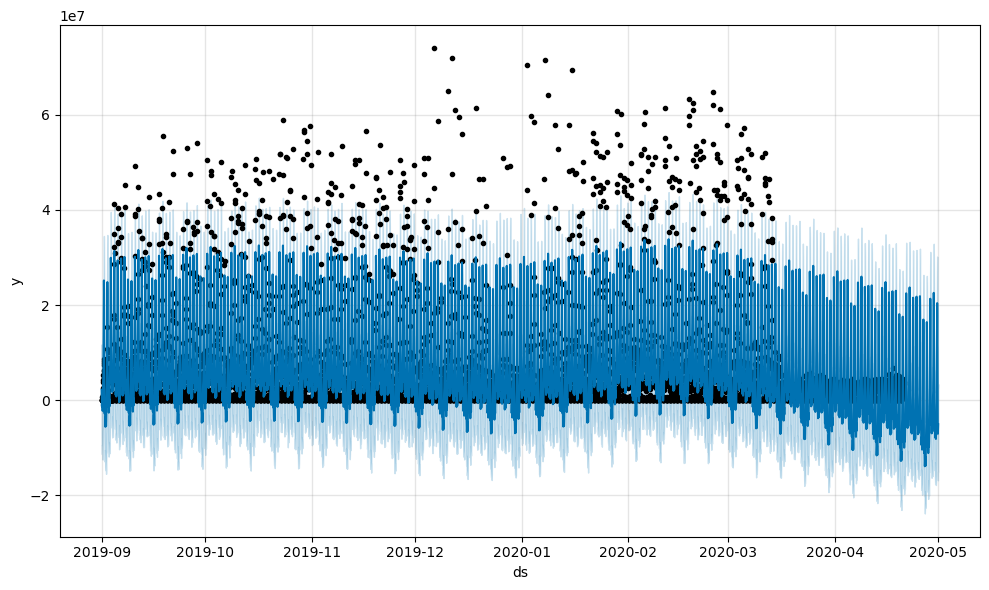

In [50]:
# train prophet on lockdown period data
m_Prophet_df= Prophet()
m_Prophet_df.fit(Prophet_train_df)

# prediction
m_Prophet_df_future = m_Prophet_df.make_future_dataframe(periods=240, freq='H')

# Plot predicted values
m_Prophet_df_forecast = m_Prophet_df.predict(m_Prophet_df_future)

m_Prophet_df.plot(m_Prophet_df_forecast) 
plt.show()

The daily pattern learned by the model over the two periods clearly isn't suitable. Setting up "changepoints" manually won't do anything as this parameter is made to deal with brutal trend shifts, and Prophet already detects changepoints per default.  
**Trend is clearly not our main issue, the drastic change in the serie is not a trend change per se.**

It seems like Prophet won't be the model that makes use of pre-lockdown data to improve our predictions.

*nb: a negative trend issue is quite obvious, just know that Prophet has parameters to limit the range of the predictions. Arbitrary limiting the forecast > 0 will improve the forecast, but it won't solve the main issue.*

## RMSE: model comparison

In [51]:
d = {'Model': ["Dampered Holt's Winters",
               "SARIMA",
               "Prophet w/ daily seasonality"], 
     'RMSE 1 day': [mean_squared_error(test[:'20200421'], holtswinters_damped.forecast(24), squared=False), 
                    mean_squared_error(test[:'20200421'], sarima.forecast(24), squared=False),
                    mean_squared_error(Prophet_test_per2.set_index('ds')['y'].loc['20200421'], m_Prophet_per2_forecast_naive.set_index('ds')['yhat'].loc['20200421'], squared=False)], 
     'RMSE 3 days': [mean_squared_error(test[:'20200423'], holtswinters_damped.forecast(3*24), squared=False),
                     mean_squared_error(test[:'20200423'], sarima.forecast(3*24), squared=False),
                     mean_squared_error(Prophet_test_per2.set_index('ds')['y'].loc[:'20200423'], m_Prophet_per2_forecast_naive.set_index('ds')['yhat'].loc['20200421':'20200423'], squared=False)], 
     'RMSE 10 days': [mean_squared_error(test[:'20200421'], holtswinters_damped.forecast(24), squared=False),
                      mean_squared_error(test, sarima.forecast(10*24), squared=False),
                      mean_squared_error(Prophet_test_per2.set_index('ds')['y'], m_Prophet_per2_forecast_naive.set_index('ds')['yhat'].loc['20200421':], squared=False)]}

RMSEs = pd.DataFrame(data=d)
RMSEs

Model     RMSE 1 day    RMSE 3 days   RMSE 10 days
0       Dampered Holt's Winters  798063.641996  785939.533784  798063.641996
1                        SARIMA  849118.861027  830917.940583  885461.010140
2  Prophet w/ daily seasonality  872924.720612  877309.181132  944920.239579

The most accurate model is the Holt's Winters exponential smoothing with dampered trend given these various RMSEs.

## Closing thoughts

**Exponential smoothing performs slightly better** than the other models (better RMSE overall). But the differences in performance might be due to randomness in the variation of the time serie (noise).

We need to keep in mind that the serie seems quite noisy with no clear daily pattern during open hours. **The approach we took is very naive** in that regard (applying a simple daily pattern and a trend). The Wifi usage is **dependant of other external variables** not taken into account (current weather, bank holiday, amount of tourists in Paris that day, etc). Using external data or having a few years of consistent data would obviously help.

Therefore, our approach is very **limited and incomplete**, even if it produces *decent* short term forecasts. Its **naivety**, the fact that the models all have been trained on a **VERY short time window**, the **noisyness of the serie**, are all servere weaknesses to our models that make them **unsuitable for long term predictions**.
